# 1. Import stuff

In [21]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re

from nltk.tokenize import word_tokenize
import twokenize
matplotlib.style.use('ggplot')
pd.options.display.max_colwidth = 100

# ReadFile in

In [22]:
directory = "data/crawled-tweets/"
filename = "master-11-07-2016.csv"
src_file = directory+filename

#size of wordembeddings
dimensions = 52

df = pd.read_csv(src_file, names=["User", "timestamp_ms", "tweet", "longitude", "latitude", "retweet_count", "favorite_count", "flag"])

In [23]:
df.head(10)

User   timestamp_ms  \
0   123790755  1467376528316   
1  1442442398  1467376529077   
2   298585296  1467376529203   
3    28834284  1467376529113   
4    27009134  1467376529303   
5    49985646  1467376529400   
6  4658015859  1467376529390   
7   421976071  1467376529514   
8   409357313  1467376529910   
9   152766660  1467376529870   

                                                                                                 tweet  \
0                                   #thedreamhunter is now trending in #London https://t.co/K1m5a2DSnm   
1                                                                        @connoroneil__ cheers buddy X   
2                     I love when Del Potro gets behind a forehand. He can just destroy a tennis ball.   
3                                                       Well this is confusing https://t.co/uouPRGfeYw   
4     The Vaccines and Stereophonics at Kilmainham @ Royal Hospital Kilmainham https://t.co/vjaRRnDpWW   
5                                    End of an era at United. Giggs is set to leave. #tearingthemapart   
6  ++ProToniX radio!⚡️ This weekend, packed with dope segments😁 &amp; music😝 @ London, United Kingd...   
7                                                     @archiebald06 cost us £30 each more but fuck it!   
8                                                      @jaydevDevlin it's only a small get together...   
9                                        @mshgodwin I'm thinking the second option, what do you think?   

   longitude   latitude  retweet_count  favorite_count  flag  
0  -0.163024  51.511755              0               0     2  
1  -3.032089  53.841189              0               0     2  
2  -2.298134  52.847090              0               0     2  
3  -0.186833  51.127727              0               0     2  
4  -6.300177  53.343303              0               0     1  
5  -3.143354  51.669456              0               0     2  
6  -0.127318  51.507115              0               0     1  
7   1.302505  51.132408              0               0     2  
8  -6.247621  53.354903              0               0     2  
9  -2.803055  55.615368              0               0     2

In [53]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

def preprocess(data, tokenizingFunction):
    tweet = data.lower()
    #remove URLs
    tweet = re.sub(r"http\S+", " ", tweet)
    #remove Usernames
    tweet = re.sub(r"\@\S+", " ", tweet)
    #remove multiple blanks
    tweet = re.sub(' +',' ', tweet)
    #remove all numbers longer than 2digits
    tweet = re.sub('\d\d[A-Za-z0-9]+',' ', tweet)
    #remove elongated elements of words
    tweet = re.sub('(.)\1{2,}','\1\1\1', tweet) 
    
    if callable(tokenizingFunction):
        tweet = tokenizingFunction(tweet)
    else:
        tweet = tweet.split()
    
    #remove those words were it's highly likely to encounter a bot
    spamWords =  {"#job", "#tides", "mph", "hire", "watt", "ktt", "watt", "watts", "kts", "hiring", "bestbroadband", "barometer"}    
    for item in tweet:
        if item in spamWords:
            return []  
    stops = set(stopwords.words("english"))
    tweet = [w for w in tweet if not w in stops and len(w) > 3] 

    #disable porter stemmer
    '''
    porter_stemmer = PorterStemmer()
    stemming_done = True
    stemmed = []
    for word in tweet: 
        stemmed.append(porter_stemmer.stem(word))
    tweet = stemmed
    '''
    
    return tweet

# Analyse preprocessed Tweets

In [9]:
TwoklengthsOfTweets = sfta.apply(preprocess, args=(twokenize.tokenize,)).str.len()

In [10]:
splitlengthsOfTweets = sfta.apply(preprocess, args=("split",)).str.len()

In [11]:
print("Number of entries that have precise GPS coordinates")
print(df[df.flag != 2].shape)
print("Tokenizer sample size")
print(sfta.shape)

Number of entries that have precise GPS coordinates
(146885, 8)
Tokenizer sample size
(15110,)


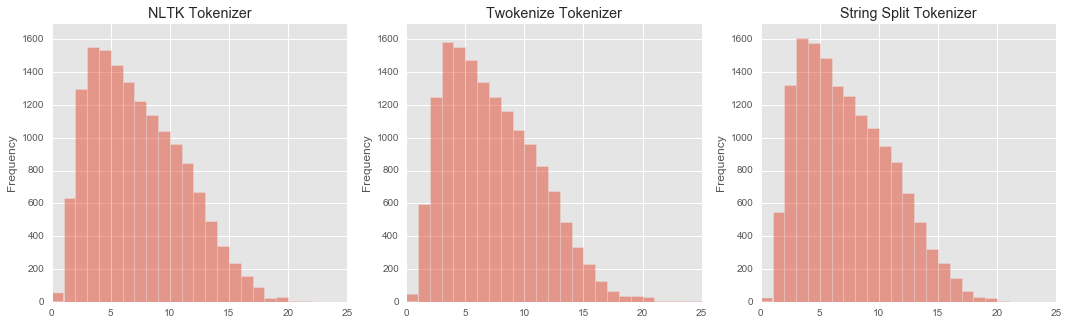

In [9]:
maxi = np.array([lengthsOfTweets.max(), TwoklengthsOfTweets.max(), splitlengthsOfTweets.max()]).max()
plt.figure(figsize=(18,5))
#NLTK Tokenizer Word length

plt.subplot(1, 3, 1)
lengthsOfTweets.plot.hist(alpha=0.5, bins=lengthsOfTweets.max())
#sns.distplot(lengthsOfTweets)
#plt.axis([0, 60, 0, 9000])
plt.axis([0, maxi, 0, 1700])
plt.title("NLTK Tokenizer")

#Twokenize Tokenizer Word length
plt.subplot(1, 3, 2)
#sns.distplot(TwoklengthsOfTweets)
TwoklengthsOfTweets.plot.hist(alpha=0.5, bins=TwoklengthsOfTweets.max())

#plt.axis([0, 60, 0, 9000])
plt.axis([0, maxi, 0, 1700])
plt.title("Twokenize Tokenizer")

#String.split Splitter Word length
plt.subplot(1, 3, 3)
#sns.distplot(splitlengthsOfTweets)


splitlengthsOfTweets.plot.hist(alpha=0.5, bins=splitlengthsOfTweets.max())
#plt.axis([0, 60, 0, 9000])
plt.axis([0, maxi, 0, 1700])
plt.title("String Split Tokenizer")

plt.savefig("Preprocessing_evaluation_without_porter.png")
plt.show()


In [10]:
#This section calculates the percentage of Agreement
# blank, twok, nltk
# [splitlengthsOfTweets, TwoklengthsOfTweets, lengthsOfTweets,]

a = splitlengthsOfTweets
b = TwoklengthsOfTweets
(a == b).sum()/float(a.size)

0.75737921906022498

In [6]:
#get a sample of tweet to analyse tokenizers performance on 1% this dataset
sfta = df["tweet"].sample(frac=0.01, replace=False, random_state=7923)

lengthsOfTweets = sfta.apply(preprocess, args=(word_tokenize,)).str.len()

[6.440168825587708, 6.441348678469374, 4.774252801124548, 7.49211543841035, 4.838014228425277]
[465.6214546452515, 465.95364953856085, 316.816496175685, 545.4925194264451, 335.69240513688624]
0.00745751816275
99999
0.00435361507981


/Users/fabian/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


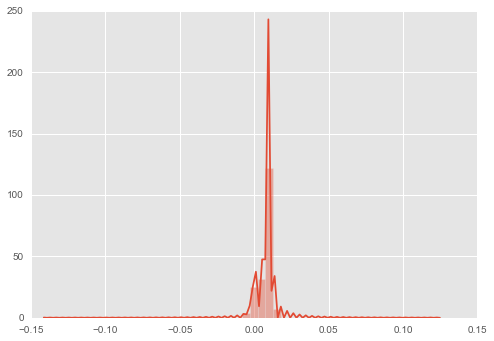

In [51]:
from geopy.distance import great_circle, vincenty
from scipy.spatial.distance import euclidean
from sklearn import preprocessing
import numpy as np
from math import sqrt

min_max_scaler = preprocessing.MinMaxScaler()

firstLat = df3.latitude.values[0]
restLat =  df3.latitude.values[1:]
                         
firstLong = df3.longitude.values[0]
restLat =  df3.longitude.values[1:]
eucRes = []
greatC = []
for i in range(1, 100000):
    eucRes.append(euclidean([firstLat, firstLong], [df3.latitude.values[i], df3.longitude.values[i]]))
    greatC.append(float(great_circle([firstLat, firstLong], [df3.latitude.values[i], df3.longitude.values[i]]).km))

print(eucRes[0:5])
print(greatC[0:5])

X_eucRes = min_max_scaler.fit_transform(np.array(eucRes).reshape(-1,1))
#X_eucRes = preprocessing.normalize(np.array(eucRes), norm='l2')

X_greatC = min_max_scaler.fit_transform(np.array(greatC).reshape(-1,1))
#X_greatC = preprocessing.normalize(np.array(X_greatC), norm='l2')

diffs = X_eucRes - X_greatC

sns.distplot(diffs)


m = np.mean(diffs)
s = np.std(diffs)
n = len(diffs)

print(m)
print(n)
print(s)
#from sklearn.metrics import mean_squared_error


#print(sqrt(mean_squared_error(X_greatC, X_eucRes)))

In [52]:
print(np.argmax(np.array(greatC).reshape(-1,1)))
print(m /(s/sqrt(n)))

df.flag[17843-1]

1903
541.679150317


2

In [5]:
#This section prints out the different tokenization results
print(df["tweet"].head(10))
print(" ")
print(df["tweet"].head(10).apply(preprocess, args=(word_tokenize,)))
print(" ")
print(df["tweet"].head(10).apply(preprocess, args=(twokenize.tokenize,)))
print(" ")
print(df["tweet"].head(10).apply(preprocess, args=("split",)))

0                                     #thedreamhunter is now trending in #London https://t.co/K1m5a2DSnm
1                                                                          @connoroneil__ cheers buddy X
2                       I love when Del Potro gets behind a forehand. He can just destroy a tennis ball.
3                                                         Well this is confusing https://t.co/uouPRGfeYw
4       The Vaccines and Stereophonics at Kilmainham @ Royal Hospital Kilmainham https://t.co/vjaRRnDpWW
5                                      End of an era at United. Giggs is set to leave. #tearingthemapart
6    ++ProToniX radio!⚡️ This weekend, packed with dope segments😁 &amp; music😝 @ London, United Kingd...
7                                                       @archiebald06 cost us £30 each more but fuck it!
8                                                        @jaydevDevlin it's only a small get together...
9                                          @mshgodwin I

# Continue Actual Preprocessing

In [54]:
#This section applies Twokenize and throws away allwords shorter than 3 chars 
#the new dataframe that we work with is now df2
df["tweetList"] = df["tweet"].apply(preprocess, args=(twokenize.tokenize,))
df2 = df[(df.tweetList.str.len() > 1) ]
#df2.rename(columns={'tweetList':'tweet'}, inplace=True)

In [55]:
df2 = df2.reset_index(drop=True)
df2.head(5)

#print(df2.tweetList.head(10))

User   timestamp_ms  \
0   123790755  1467376528316   
1   298585296  1467376529203   
2    27009134  1467376529303   
3    49985646  1467376529400   
4  4658015859  1467376529390   

                                                                                                 tweet  \
0                                   #thedreamhunter is now trending in #London https://t.co/K1m5a2DSnm   
1                     I love when Del Potro gets behind a forehand. He can just destroy a tennis ball.   
2     The Vaccines and Stereophonics at Kilmainham @ Royal Hospital Kilmainham https://t.co/vjaRRnDpWW   
3                                    End of an era at United. Giggs is set to leave. #tearingthemapart   
4  ++ProToniX radio!⚡️ This weekend, packed with dope segments😁 &amp; music😝 @ London, United Kingd...   

   longitude   latitude  retweet_count  favorite_count  flag  \
0  -0.163024  51.511755              0               0     2   
1  -2.298134  52.847090              0               0     2   
2  -6.300177  53.343303              0               0     1   
3  -3.143354  51.669456              0               0     2   
4  -0.127318  51.507115              0               0     1   

                                                                                       tweetList  
0                                                           [#thedreamhunter, trending, #london]  
1                                   [love, potro, gets, behind, forehand, destroy, tennis, ball]  
2                             [vaccines, stereophonics, kilmainham, royal, hospital, kilmainham]  
3                                                      [united, giggs, leave, #tearingthemapart]  
4  [++protonix, radio, weekend, packed, dope, segments😁, &amp;, music😝, london, united, kingdom]

# Train Word Embeddings

In [9]:
#run the gensim word2vec model on 
# Only retrain when saved to different model file!
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    
#size of wordembeddings
dimensions = 52

print("begin with word2vec")

model = gensim.models.Word2Vec(alpha=0.025, min_alpha=0.025, workers=4, size=dimensions, sg=0, min_count=3)  # use fixed learning rate
model.build_vocab(df2.tweetList)
for epoch in range(10):
    model.train(df2.tweetList)
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay
model.save("ukmodel2.model")

begin with word2vec


In [26]:
#when model is already trained, just load UKmodel
import gensim, logging
model_name = "ukmodel.model"
model = gensim.models.Word2Vec.load(model_name)

In [28]:
print(model.similarity("bottle", "table"))


0.482522111823


# Creat the Tweet Level Representation

In [56]:
#use tfidf to make sure that words with low tfidf wont be pooled

from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(df2['tweetList'].str.join(" "))

In [59]:
v.get_feature_names()[:10]

['00', '01', '01_08_', '02', '03', '04', '05', '06', '07', '08']

In [34]:
import numpy

def createAvgPooledTweet(tweet):
        itera = 0
        #dimensions = 52
        avgpooledTweets = np.zeros(dimensions)
        for word in tweet:
            #only allow words with a TFIDF that is not too low
            if word in model: #TODO: check lookup in vectorizer to find out if word exceed treshold and x: 
                itera += 1
                avgpooledTweets += model[word]
        return (avgpooledTweets / itera)

def createMaxPooledTweet(tweet):
        #dimensions = 52
        maxpooledTweets = np.zeros(dimensions)
        for word in tweet:
            if word in model:       
                for k, dimen in enumerate(model[word]):
                    if dimen > maxpooledTweets[i, k]:
                        maxpooledTweets[i, k] = dimen
        return (maxpooledTweets)


In [60]:
df2["AvgWordEmbeddings"] = pd.Series(data=df2.tweetList.apply(createAvgPooledTweet), copy=True)
#df2.MaxWordEmbeddings = df2.tweetList.apply(createMaxPooledTweet)

In [61]:
df2.head(5)

User   timestamp_ms  \
0   123790755  1467376528316   
1   298585296  1467376529203   
2    27009134  1467376529303   
3    49985646  1467376529400   
4  4658015859  1467376529390   

                                                                                                 tweet  \
0                                   #thedreamhunter is now trending in #London https://t.co/K1m5a2DSnm   
1                     I love when Del Potro gets behind a forehand. He can just destroy a tennis ball.   
2     The Vaccines and Stereophonics at Kilmainham @ Royal Hospital Kilmainham https://t.co/vjaRRnDpWW   
3                                    End of an era at United. Giggs is set to leave. #tearingthemapart   
4  ++ProToniX radio!⚡️ This weekend, packed with dope segments😁 &amp; music😝 @ London, United Kingd...   

   longitude   latitude  retweet_count  favorite_count  flag  \
0  -0.163024  51.511755              0               0     2   
1  -2.298134  52.847090              0               0     2   
2  -6.300177  53.343303              0               0     1   
3  -3.143354  51.669456              0               0     2   
4  -0.127318  51.507115              0               0     1   

                                                                                       tweetList  \
0                                                           [#thedreamhunter, trending, #london]   
1                                   [love, potro, gets, behind, forehand, destroy, tennis, ball]   
2                             [vaccines, stereophonics, kilmainham, royal, hospital, kilmainham]   
3                                                      [united, giggs, leave, #tearingthemapart]   
4  [++protonix, radio, weekend, packed, dope, segments😁, &amp;, music😝, london, united, kingdom]   

                                                                                     AvgWordEmbeddings  
0  [0.107983142138, -0.21552160879, 1.95650994529, 0.235422149301, -1.4569664076, 1.53436634938, 0....  
1  [-0.0981614161283, -0.309023637325, -0.624740086263, -0.0938148526475, 0.519130243571, -0.498329...  
2  [1.72854802012, 2.04076565802, 0.817192355792, 0.400311802824, -0.832726528247, -0.592731795584,...  
3  [-1.5554847916, 0.780769745509, -0.864477554957, 1.16388440132, -0.145415008068, -0.890219489733...  
4  [-0.511844826524, 1.02344850925, 0.37666635537, -0.921045774763, -0.738092326305, -0.17861876230...

In [62]:
#df2.reset_index(level=0, inplace=True)
df2.AvgWordEmbeddings.head()

0    [0.107983142138, -0.21552160879, 1.95650994529, 0.235422149301, -1.4569664076, 1.53436634938, 0....
1    [-0.0981614161283, -0.309023637325, -0.624740086263, -0.0938148526475, 0.519130243571, -0.498329...
2    [1.72854802012, 2.04076565802, 0.817192355792, 0.400311802824, -0.832726528247, -0.592731795584,...
3    [-1.5554847916, 0.780769745509, -0.864477554957, 1.16388440132, -0.145415008068, -0.890219489733...
4    [-0.511844826524, 1.02344850925, 0.37666635537, -0.921045774763, -0.738092326305, -0.17861876230...
Name: AvgWordEmbeddings, dtype: object

In [63]:
from datetime import datetime, date

try:
    df2["timestamp_ms"] = df2.timestamp_ms.apply(lambda x: datetime.fromtimestamp(int(x) // 1000))
    pd.to_datetime(df2.timestamp_ms)
    df2 = df2.set_index(['timestamp_ms'])
    df2.index
except:
    print("Data was already converted")

#df2["timestamp_ms"] = df2.timestamp_ms.astype('datetime64[ns]')
#df2["TimeReviewed"] = pd.to_datetime(df2["timestamp_ms"])

In [64]:
#allow only tweets with precise coordinates for clustering
df2 = df2[df2.flag == 1]

In [65]:
#user, lat, long, date as index?, Tweet
#df2 = df2.dropna()

df2.head()

User  \
timestamp_ms                      
2016-07-01 14:35:29    27009134   
2016-07-01 14:35:29  4658015859   
2016-07-01 14:35:31  1731651644   
2016-07-01 14:35:31   257463123   
2016-07-01 14:35:33   625576341   

                                                                                                                   tweet  \
timestamp_ms                                                                                                               
2016-07-01 14:35:29     The Vaccines and Stereophonics at Kilmainham @ Royal Hospital Kilmainham https://t.co/vjaRRnDpWW   
2016-07-01 14:35:29  ++ProToniX radio!⚡️ This weekend, packed with dope segments😁 &amp; music😝 @ London, United Kingd...   
2016-07-01 14:35:31  Queue for the Somme memorial service. Lest we forget...  #Somme #London #westminster #somme100 @...   
2016-07-01 14:35:31  Our Registration forms are on their  way to the NCEL.... Once confirmed we'll release a full squ...   
2016-07-01 14:35:33            Can't believe I've finally graduated college 🎓🎉 @ Ashford College https://t.co/spLEVnWWmd   

                     longitude   latitude  retweet_count  favorite_count  \
timestamp_ms                                                               
2016-07-01 14:35:29  -6.300177  53.343303              0               0   
2016-07-01 14:35:29  -0.127318  51.507115              0               0   
2016-07-01 14:35:31  -0.128285  51.499740              0               0   
2016-07-01 14:35:31  -1.526187  53.393434              0               0   
2016-07-01 14:35:33   0.860490  51.139525              0               0   

                     flag  \
timestamp_ms                
2016-07-01 14:35:29     1   
2016-07-01 14:35:29     1   
2016-07-01 14:35:31     1   
2016-07-01 14:35:31     1   
2016-07-01 14:35:33     1   

                                                                                                               tweetList  \
timestamp_ms                                                                                                               
2016-07-01 14:35:29                                   [vaccines, stereophonics, kilmainham, royal, hospital, kilmainham]   
2016-07-01 14:35:29        [++protonix, radio, weekend, packed, dope, segments😁, &amp;, music😝, london, united, kingdom]   
2016-07-01 14:35:31               [queue, somme, memorial, service, lest, forget, #somme, #london, #westminster, #somme]   
2016-07-01 14:35:31  [registration, forms, ncel, ...., confirmed, we'll, release, full, squad, update, #building, ......   
2016-07-01 14:35:33                                [can't, believe, i've, finally, graduated, college, ashford, college]   

                                                                                                       AvgWordEmbeddings  
timestamp_ms                                                                                                              
2016-07-01 14:35:29  [1.72854802012, 2.04076565802, 0.817192355792, 0.400311802824, -0.832726528247, -0.592731795584,...  
2016-07-01 14:35:29  [-0.511844826524, 1.02344850925, 0.37666635537, -0.921045774763, -0.738092326305, -0.17861876230...  
2016-07-01 14:35:31  [0.758710545301, 4.00647789836, -1.57328389585, -0.370112094283, -1.75495341122, -0.90380409956,...  
2016-07-01 14:35:31  [-0.70896384599, -0.192195546414, -1.10503615865, 0.0495893847463, -1.48540115609, 0.07224419120...  
2016-07-01 14:35:33  [1.05980419973, 1.10832135379, 0.173837810755, 0.513005072251, 0.368151036091, -0.692857531831, ...

# Method 1: One-step unified distance metric

In [ ]:
#custom distance function ftw
from geopy.distance import great_circle, vincenty
from scipy.spatial.distance import cosine, euclidean
from datetime import datetime, date

#0 is lat, 1 is long, 3 is time, 4 to end is word embedding. Variable number of dimensions of word embeddings possible
def d(a,b, p="not"):
    
    timesim = abs((datetime.fromtimestamp(a[3]) - datetime.fromtimestamp(b[3])).days + 1) * time_weight
    if timesim < 1:
        spatialsim = (float(vincenty((a[0], a[1]), (b[0], b[1])).km)) * loc_weight
        
        if timesim + spatialsim < 1:
            textsim = cosine(a[4:], b[4:]) * text_weight
            #vinc = (float(euclidean((a[0], a[1]), (b[0], b[1])).km)) * 0.01
            if p == "do":
                if textsim < 1:
                    print(b[2])

                print("text: " + str(textsim))

                print("time: " + str(timesim))
                print("spatial: "+ str(spatialsim))
                print("clean spatial in km " + str(spatialsim/0.01))
                #print(" ")
                return True
        else:
            if p == "do":
                return False
            else:
                return timesim + spatialsim + 1
    else:
        if p == "do":
            return False
        else:
            return timesim + 2
    
    return  spatialsim + timesim + textsim

In [ ]:
#build a function that does the unified thing
def method1(dataframe, we, minpts):
    #pick features for DBSCAN
    #print(dataframe.index.values)
    
    
    B = np.zeros((len(dataframe),dimensions+4),float)
    B[:,0]= dataframe.latitude.values
    B[:,1]= dataframe.longitude.values
    B[:,2]= dataframe.User.values
    B[:,3]= (dataframe.index.values.astype('uint64') / 1e9).astype('uint32')
    B[:,4:]=np.vstack(we)
    
    B = B[~np.isnan(B).any(axis=1)]
    

    
    db = DBSCAN(eps=1, min_samples=minpts, metric=d, algorithm='ball_tree').fit(B)
    #db = AgglomerativeClustering(n_clusters=10, affinity=d, linkage="complete").fit(dat)
    return db.labels_


# Method 2: Stepwise aggregation

In [68]:
#the other method
def method2_location(dataframe, minpts, eps):
    #make feature array from subset
    start = time.time()
    
    #firstN = 500
    columns = ["longitude", "latitude"]
    
    #take sample of day
    features = dataframe[list(columns)].values
    
    #run DBSCAN on just coordinates using euclidean distance
    dbmodel = DBSCAN(eps=eps, min_samples=minpts, metric="euclidean", algorithm='ball_tree')
    db = dbmodel.fit(features)
    end = time.time()
    
    #dailyTweets
    print(str(dailyTweets.index.day[0]) + " day Clustered. The passed time is: " + str(end-start))    
    
    return db.labels_

# Make the Maps and do most frequent word analysis

In [188]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cosine, euclidean
import time
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
from collections import Counter
import pprint
from geopy.geocoders import Nominatim

from openpyxl import load_workbook
from openpyxl import Workbook

#coreComponents is a dictionary that carries for each label the 
# wordembedding representations of the core components of the clustering result
def make_the_Cluster_Eval(labels, dataframe, meth, sample_size, seed_no, timePassed=0): 
    """
    This function takes the clustering results in form of a labelled array, use those labels to 
    access the sampledDataFrame, which contains latitude longitude and the preprocessed Tweets
    in word form.
    """
    
    try:
        stemming_true
    except NameError:
        stemming_true = False
    
    geolocator = Nominatim()
    
    ###BEGIN map variable preparation and config
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    n_clusters_ = 1
    
    #define bounding box for map
    bbox = {
        'lon': -4.5,
        'lat': 55.5,
        'll_lon': -11,
        'll_lat': 50,
        'ur_lon': 2,
        'ur_lat': 61
    }    
    plt.figure(figsize=(15,15))
    m = Basemap(
        projection='merc', lon_0=bbox['lon'], lat_0=bbox['lat'], resolution="l",
        llcrnrlon=bbox['ll_lon'], llcrnrlat=bbox['ll_lat'],
        urcrnrlon=bbox['ur_lon'], urcrnrlat=bbox['ur_lat'])
    m.drawcoastlines()
    
    #fill continents?
    m.fillcontinents(color='gray', lake_color='aqua', zorder=5)
    m.drawmapboundary(fill_color='aqua')
    
    ####END map config
    
    makeMapLater = False
    
    evalList = []
    print("start calculating")
    #plot each cluster individually
    for k, col in zip(unique_labels, colors):
        
        if k == -1:
            # Black used for noise.
            col = 'k'
             
        #currentClusterDF = subset dataframe by current k by index given in label variable
        class_member_mask = (labels == k)
        
        
        #get number of distinct users in this cluster.
        DistinctUsers = [] #pd.value_counts(dataframe.User.values).size #len(set(xy[:,2]))
        #print("The number of distinct users in this cluster is" + str(numOfDistinctUsers))
        #print(dataframe.latitude.values)
        x1 = dataframe.longitude.values
        y1 = dataframe.latitude.values
        period = dataframe.index.values[class_member_mask]
        
        x1 = x1[class_member_mask]

        y1 = y1[class_member_mask]
        x1, y1 = m(x1, y1)
        
        noise_percentage = sum((labels == -1))/len(class_member_mask) * 100
        
        if k == -1:
            # don't print noise, but count number of noise tweets
            print("There were " + str(sum((labels == k))) + " out of " + str(len(class_member_mask)) + " Tweets that were clustered as noise")
            print("This is " + str(noise_percentage) + "%.")
            #append the noise cluster to evalList
            
            
            # m.scatter(x1, y1, s=4, marker="o", c=col, alpha=0.5, zorder=10)
            
        else:
            #plot k to map at position 
            wordsOfCluster = []
            tweetsOfCluster = []
            avgWEofAllTweetsInCluster = np.zeros(dimensions)
            xtxt = 0
            ytxt = 0
            numOfDocs = 0
            #loop through all clusters to visualise
            for i, label in enumerate(labels):
                
                if label == k:
                    numOfDocs += 1
                    #print(dataframe.tweetList)
                    #das ist der tweet
                    #print(' '.join(tweets[i]))
                    
                    if dataframe.User.ix[i] not in DistinctUsers:
                        DistinctUsers.append(dataframe.User.ix[i])
                    
                    tweetsOfCluster.append(dataframe.tweet.ix[i])
                    avgWEofAllTweetsInCluster += dataframe.AvgWordEmbeddings.ix[i]
                    
                    if xtxt == 0 and ytxt == 0:
                        xotxt = dataframe.latitude.ix[i]
                        yotxt = dataframe.longitude.ix[i]
                        xtxt, ytxt = m(yotxt, xotxt)
                    else:
                        xotxt += dataframe.latitude.ix[i]
                        yotxt += dataframe.longitude.ix[i]
                    
                    for word in dataframe.tweetList.ix[i]:
                        
                        wordsOfCluster.append(word)
            
            #'center of cluster'
            avgWEofAllTweetsInCluster /= numOfDocs
                        
            #average cluster location, the number of tweets in cluster tells 
            #us how many GPS coordinates were averaged
            xotxt = xotxt / len(tweetsOfCluster)
            yotxt = yotxt / len(tweetsOfCluster)
            
            
            #evaluate clusters
            wfcnt = Counter(wordsOfCluster)
            
            numForbiddenClusters = 0
            
            #thresholding for cluster relevance, to avoid spam clusters of single users
            if wfcnt.most_common()[0][1]/len(tweetsOfCluster) > 0.05 and len(DistinctUsers) > 2:
                makeMapLater = True
                print(str(n_clusters_) + ". Cluster, with " + str(len(tweetsOfCluster)) + " tweets, " + str(len(DistinctUsers)) + " distinct users.")
                
                
                fro =  pd.to_datetime(str(period.min()))
                to = pd.to_datetime(str(period.max()))
                interval = "From: " +  fro.strftime('%d.%m.%Y') + " To: " + to.strftime('%d.%m.%Y')

                print("This cluster is " + interval)
                
                print(" ")
                location = geolocator.reverse((xotxt, yotxt))
                print((xotxt, yotxt))
                place = str(', '.join(location.address.split(',')[-5:-3]))
                print("Location: " + place)
                print("Most similar words:")
                msw = model.similar_by_vector(avgWEofAllTweetsInCluster)
                msw = [c[0] for c in msw[:10] ]
                print(msw)
                print(" ")
                pp = pprint.PrettyPrinter(indent=4)
                
                print("The most freq. words are: ")
                mfw = wfcnt.most_common()[0:10]
                pp.pprint(mfw)

                #plot points
                m.scatter(x1, y1, s=10, marker="x", c=col, alpha=1, zorder=20)
                
                #print cluster numbers on plot      
                plt.text(xtxt, ytxt, str(n_clusters_), fontsize=10, fontweight='bold', ha='left',va='bottom',color='k', zorder=150)
                
                #print(x1)
                
                print(" ")
                
                
                #make sure we don't accidentially print too much
                if len(tweetsOfCluster) > 50:
                    pp.pprint(tweetsOfCluster[:50])
                else:
                    pp.pprint(tweetsOfCluster) 
                print(" ------------- ")
                print(" ")
                
                #write result to pandas
                
                #sample_size, seed
                
                evalList += [[int(time.time()), meth, minpts, 1, dimensions, time_weight, loc_weight, text_weight, seed_no, 
                              sample_size, timePassed, n_clusters_, len(tweetsOfCluster), len(DistinctUsers), noise_percentage, place, interval, mfw, msw, tweetsOfCluster, stemming_true]]   
                
                print("the eval list is: ")
                n_clusters_ += 1
                #print(evalList) 
                #except:
                #    evalFrame =  pd.DataFrame({'Method' : meth, 'Cluster_Number' : k, 'Centre_location_of_cluster' : place, 
                #        'Time_of_cluster' : interval,'Most_frequent_words' : mfw, 'Most_similar_by_WE' : msw, 
                #        'Tweets_in_cluster' : tweetsOfCluster, 'minpts' : minpts, 'eps' : 1, 'stemming_true' : stemming_true, 
                #        'seed' : seed_no, 'sample_size' : sample_size, 'timePassed' : timePassed, 'noise_percentage' : noise_percentage})


                #Method, Cluster_Number, location, Time, Most_frequent_words, similar_by_WE'
                #Tweets_in_cluster, 'minpts', 'eps', 'stemming_true', 'seed', 'sample_size', timePassed
                                                
                                                
                
            else:
                numForbiddenClusters += 1
    
    if makeMapLater:
        plt.title("Clustered tweets from GB %d" % n_clusters_)
        plt.savefig(time.strftime("/Users/fabian/Dropbox/Warwick/Dissertation/Mining-Twitter/plots/map-%h-%m-%s-%d-%m-%Y.png"))
        plt.show()
        
        if numForbiddenClusters > 0:
            print("The number of clusters that were ignored because of quality issues is: " + str(numForbiddenClusters))
    else:
        print("Attempted to make map but there were not enough Tweets produce good clusters.")
        print(" ")
        plt.close()
        
        if not evalList:
            evalList += [[int(time.time()), meth, minpts, 1, dimensions, seed_no, 
                              sample_size, timePassed, 0, 0, 0, noise_percentage, "N/A", "N/A", "N/A", "N/A", "N/A", stemming_true]]    
        
    #append results to csv file: bit of src code taken from http://stackoverflow.com/questions/20219254/how-to-write-to-an-existing-excel-file-without-overwriting-data-using-pandas
    evalFrame = pd.DataFrame(data = evalList, columns=['Time','Method', 'minpts', 'eps', 'Cnt_WE_Dimensions', 'time_weight', 'loc_weight', 'text_weight',
                        'seed', 'sample_size', 'timePassed', 'Cluster_ID', 'Cnt_Tweets', 'Cnt_users', 'noise_percentage', 'Centre_location', 
                        'Time_interval','Most_frequent_words', 'Most_similar_by_WE', 
                        'Tweets', 'stemming_true'])
                
    xlfile = '/Users/fabian/Dropbox/Warwick/Dissertation/Mining-Twitter/experiment_records.csv'
    
    evalFrame.to_csv(xlfile, mode="a", header=False)

    #print(evalFrame)
   

SyntaxError: invalid syntax (<ipython-input-188-f5b6693187ed>, line 230)

# apply both methods and use function to plot results

The current seed is: 121.
 
Set size 100 took: 0.6454169750213623 secs. 
start calculating
1. Cluster, with 3 tweets, 3 distinct users.
This cluster is From: 03.07.2016 To: 09.07.2016
 
(51.523290283333331, -0.089337650000000005)
Location:  London Borough of Islington,  London,  Greater London,  England
Most similar words:
['london', 'greater', 'islington', 'wdsa', 'hammersmith', 'harringay', 'twickenham', 'funscape', 'picturehouse', 'birmingham']
 
The most freq. words are: 
[   ('london', 6),
    ('greater', 4),
    ('hall', 1),
    ('islington', 1),
    ('authority', 1),
    ('southwark', 1),
    ('city', 1)]
 
[   "I'm at City Hall (Greater London Authority) - @mayoroflondon in "
    'Southwark, Greater London https://t.co/6JaonyuAJb',
    "I'm at @ShoreditchGrind in London, Greater London https://t.co/pFAgyYU39M",
    "I'm at Islington in London, Greater London https://t.co/BzW3vvGmsj"]
 ------------- 
 
the eval list is: 
There were 97 out of 100 Tweets that were clustered as noi

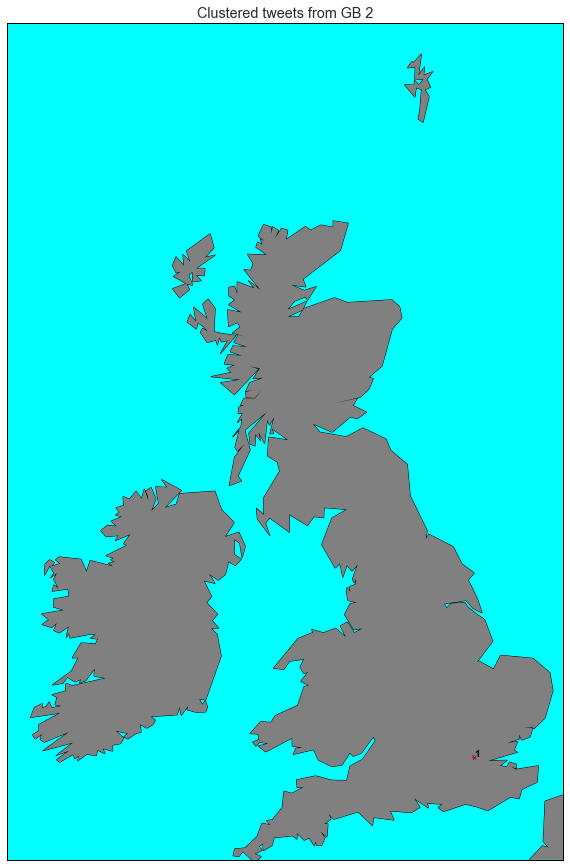

 
Set size 300 took: 5.979931831359863 secs. 
start calculating
1. Cluster, with 3 tweets, 3 distinct users.
This cluster is From: 06.07.2016 To: 10.07.2016
 
(51.507114860000001, -0.12731804999999999)
Location:  City of Westminster,  London,  Greater London,  England
Most similar words:
['kingdom', 'united…', 'paddington…', 'brockely', '#farewell', 'aquarium™', 'kindom', '🇬🇧💕', 'anywhere🌍', 'wonderground']
 
The most freq. words are: 
[   ('kingdom', 3),
    ('london', 3),
    ('united', 3),
    ('#london', 1),
    ('#nofilter', 1),
    ('#eidmubarak', 1),
    ('ayee', 1),
    ('#summer', 1),
    ('#shramzb', 1),
    ('chasing', 1)]
 
[   '#nofilter 😍😍😍 @ London, United Kingdom https://t.co/JDhpD2dbQv',
    'Mat Ri Ayee.. #eidmubarak #SHRAMZB @ London, United Kingdom '
    'https://t.co/NtLpqRw1gM',
    'Chasing the #summer in #london @ London, United Kingdom '
    'https://t.co/XIGGNIGXn0']
 ------------- 
 
the eval list is: 
There were 293 out of 300 Tweets that were clustered as n

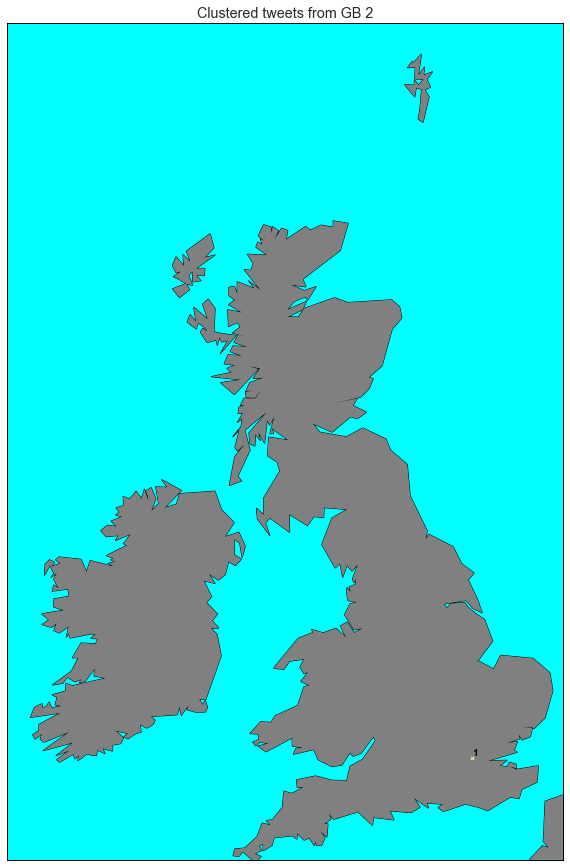

 
Set size 500 took: 15.920881032943726 secs. 
start calculating
1. Cluster, with 12 tweets, 8 distinct users.
This cluster is From: 03.07.2016 To: 10.07.2016
 
(52.38032890249999, -1.7329278866666666)
Location:  Knowle,  Solihull,  West Midlands,  England
Most similar words:
['#broadbandcompareuk', 'se15', '#bestbroadband', 'se17', 'se5', 'sm1', 'se1p', 'tw2', 'se16', 'e11']
 
The most freq. words are: 
[   ('#broadbandcompareuk', 5),
    ('#bestbroadband', 5),
    ('broadband', 4),
    ('date', 2),
    ('visiting', 2),
    ('deals', 2),
    ('#broadbanddeals', 2),
    ('information', 2),
    ('great', 2),
    ('visit', 2)]
 
[   'Increased internet speeds in E11 1TU? Find out more at '
    'https://t.co/hCxi5xbuNM #broadbandcompareuk #bestbroadband',
    'Get the most up to date information about broadband in SE17 1QR by '
    'visiting https://t.co/I5bc9nk0dm #broadbandcompareuk #bestbroadband',
    'Get the most up to date information about broadband in SE15 2LD by '
    'visiting 

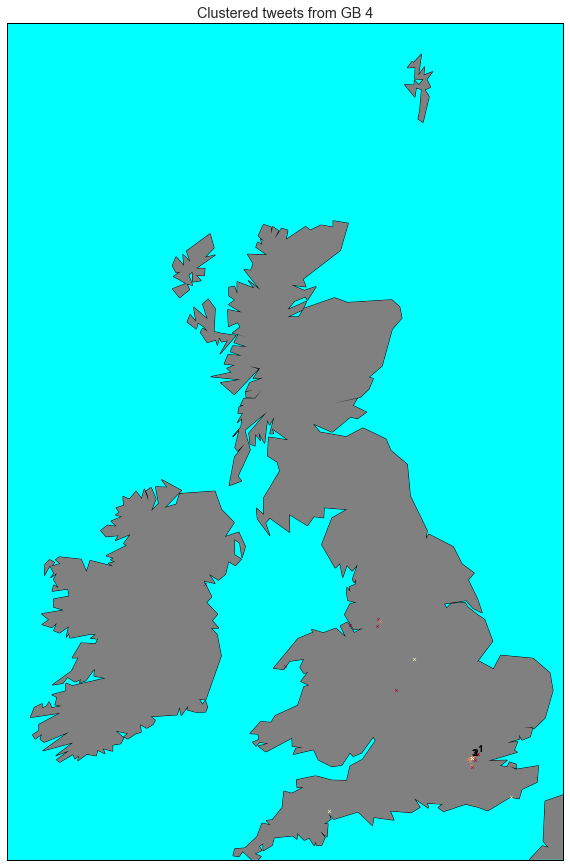

The number of clusters that were ignored because of quality issues is: 1
 


In [187]:
#Method1

import random
import time


time_weight = 0.03
loc_weight = 0.06
text_weight = 4

listOfDifferentSizes = [100,300, 500]

#set seed for sample
seed = 121
print("The current seed is: " + str(seed) + ".")
print(" ")
random.seed(seed)

for set_size in listOfDifferentSizes:
    rindex =  np.array(random.sample(range(len(df2)), set_size))
    sampleForMethod1 = df2.ix[rindex]
    
    #print(sampleForMethod1.index)
    
    #wordembeddings have to be separately picked
    we = df2.AvgWordEmbeddings.ix[rindex]
    #sampleForMethod1 = df2.sample(n=set_size, random_state=seed)
    #print(we.values)
    start = time.time()
    minpts=3
    eps=1
    labelsMethod1 = method1(sampleForMethod1, we.values, minpts)
    timePassed = time.time() - start
    print("Set size " + str(set_size) + " took: " + str(timePassed) + " secs. ")
    
    make_the_Cluster_Eval(labelsMethod1, sampleForMethod1, meth=1, sample_size=set_size, seed_no=seed, timePassed=timePassed)
    print(" ")

# Method 2

In [183]:
#custom distance function ftw

from scipy.spatial.distance import cosine

#0 is lat, 1 is long, 3 is time, 4 to end is word embedding. Variable number of dimensions of word embeddings possible
def d2(a,b):
    return cosine(a, b) * text_weight

Begin Analysis for next day
1 day Clustered. The passed time is: 0.014724969863891602
labelsMethod2_loc: 1000
start calculating
Method 2 took: 4.97479510307312
start calculating
1. Cluster, with 12 tweets, 12 distinct users.
This cluster is From: 01.07.2016 To: 01.07.2016
 
(51.496236324999991, -0.16000473999999998)
Location:  Royal Borough of Kensington and Chelsea,  London,  Greater London,  England
Most similar words:
['london', 'greater', 'kensington', 'hammersmith', 'picturehouse', 'harringay', 'wdsa', 'funscape', '9¾', 'aldgate']
 
The most freq. words are: 
[   ('london', 22),
    ('greater', 13),
    ('kensington', 2),
    ('south', 2),
    ('citigroup', 1),
    ('wharf', 1),
    ('centre', 1),
    ('bolingbroke', 1),
    ('workshop', 1),
    ('&amp;', 1)]
 
[   "I'm at Victoria and Albert Museum (V&amp;A) in South Kensington, Greater "
    'London https://t.co/LoQyotvYVp',
    "I'm at @NationalGallery in London, Greater London https://t.co/tMzoAx7wEE",
    "I'm at @OxfordStree

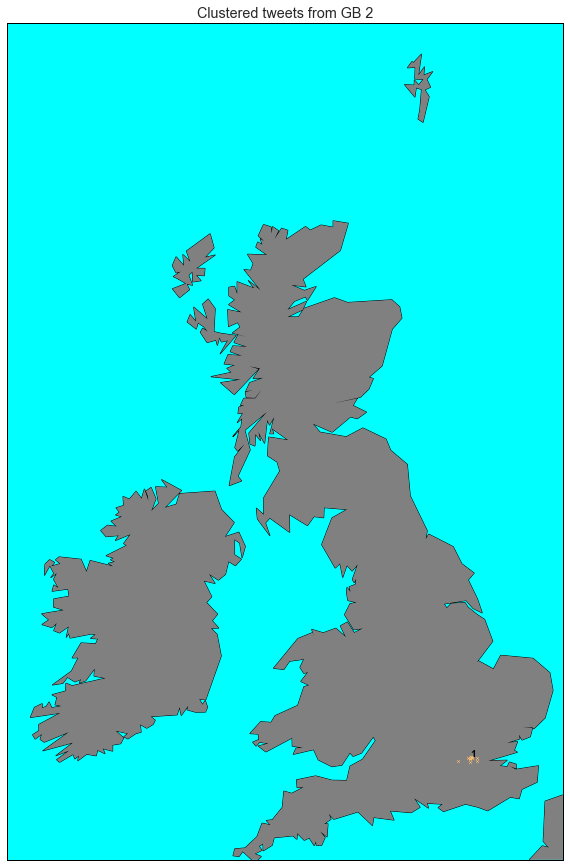

The number of clusters that were ignored because of quality issues is: 1
Making the Map took: 6.334394931793213
Method 2 took: 0.06897091865539551
start calculating
There were 29 out of 34 Tweets that were clustered as noise
This is 85.2941176471%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6009609699249268
Method 2 took: 0.026620149612426758
start calculating
1. Cluster, with 5 tweets, 3 distinct users.
This cluster is From: 01.07.2016 To: 01.07.2016
 
(55.861916498000006, -4.2617048999999998)
Location:  Cranston Hill,  Blythswood Hill,  Glasgow City,  Scotland
Most similar words:
['eastbound', 'westbound', 'southbound', 'haggs', 'lanes', 'northbound', 'j14', 'j23', 'bankhead', 'j1']
 
The most freq. words are: 
[   ('queue', 5),
    ('restricted', 5),
    ('indefinitely', 5),
    ('lanes', 5),
    ('eastbound', 2),
    ('westbound', 2),
    ('helen', 2),
    ('#road', 2),
    ('carriageway', 1),
    ('slip', 1)]
 
[   '#Road

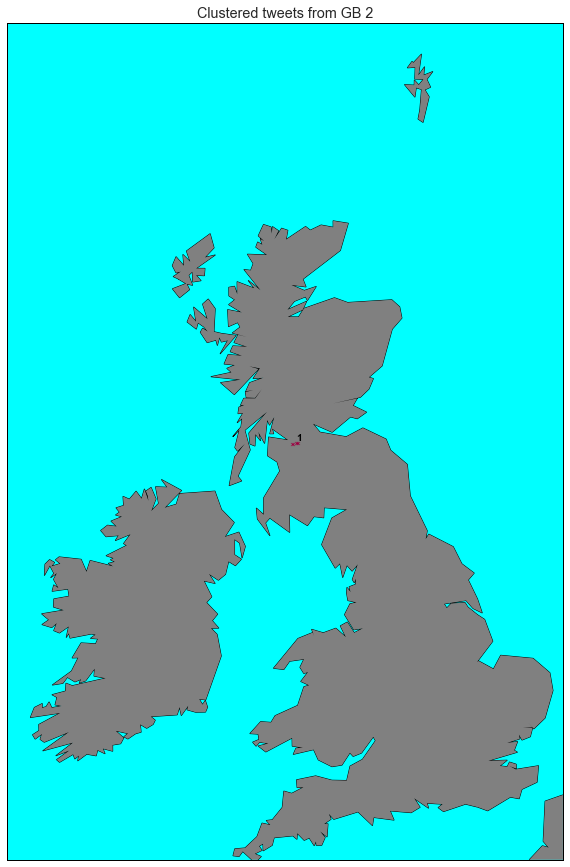

Making the Map took: 1.3996820449829102
Method 2 took: 0.010185956954956055
start calculating
There were 1 out of 12 Tweets that were clustered as noise
This is 8.33333333333%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6399221420288086
Method 2 took: 0.011731147766113281
start calculating
1. Cluster, with 6 tweets, 5 distinct users.
This cluster is From: 01.07.2016 To: 01.07.2016
 
(51.537521399999996, -0.89977000000000007)
Location:  Remenham CP,  Wokingham,  South East,  England
Most similar words:
['henley', 'regatta', 'royal', '#henley2016', '#henleyregatta', '#regatta', '#rowing', '#henley', '#henleyonthames', 'botanic…']
 
The most freq. words are: 
[   ('royal', 6),
    ('henley', 6),
    ('regatta', 6),
    ('#henley', 2),
    ('#shoplocal', 1),
    ('🚣🏼👒🍾', 1),
    ('#hrh', 1),
    ('#limitededition', 1),
    ("o'clock.", 1),
    ('#british', 1)]
 
[   '@gatsbymenswear #limitededition day out @henleyregatta #shoploca

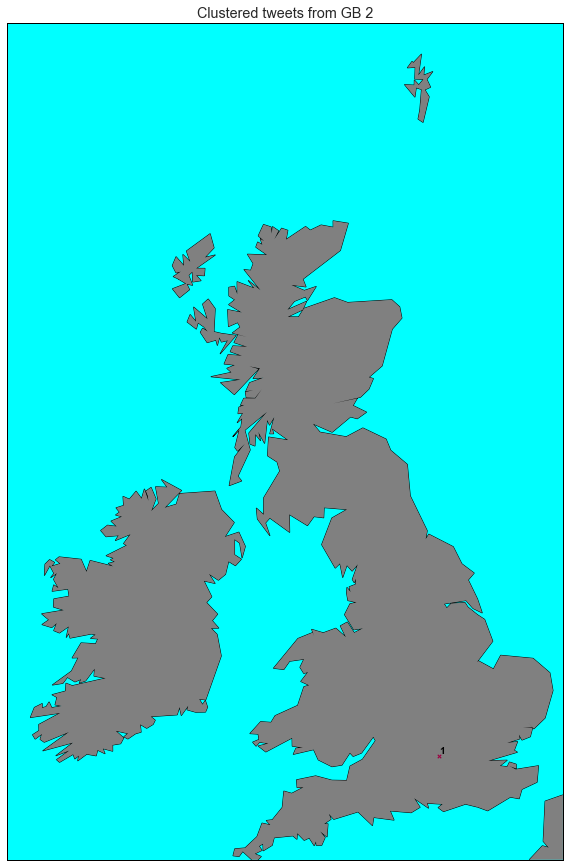

Making the Map took: 1.4500131607055664
Method 2 took: 0.007018089294433594
start calculating
There were 1 out of 9 Tweets that were clustered as noise
This is 11.1111111111%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6136219501495361
There were 334 Tweets that were clustered as noise
Begin Analysis for next day
2 day Clustered. The passed time is: 0.008964061737060547
labelsMethod2_loc: 1000
start calculating
Method 2 took: 3.899163007736206
start calculating
1. Cluster, with 8 tweets, 8 distinct users.
This cluster is From: 02.07.2016 To: 02.07.2016
 
(51.513387396250003, -0.16736189375000002)
Location:  City of Westminster,  London,  Greater London,  England
Most similar words:
['london', 'greater', 'harringay', 'hammersmith', 'funscape', 'picturehouse', 'wdsa', '9¾', 'kensington', 'twickenham']
 
The most freq. words are: 
[   ('london', 16),
    ('greater', 9),
    ('highbury', 1),
    ('soho', 1),
    ('clerkenwell', 1)

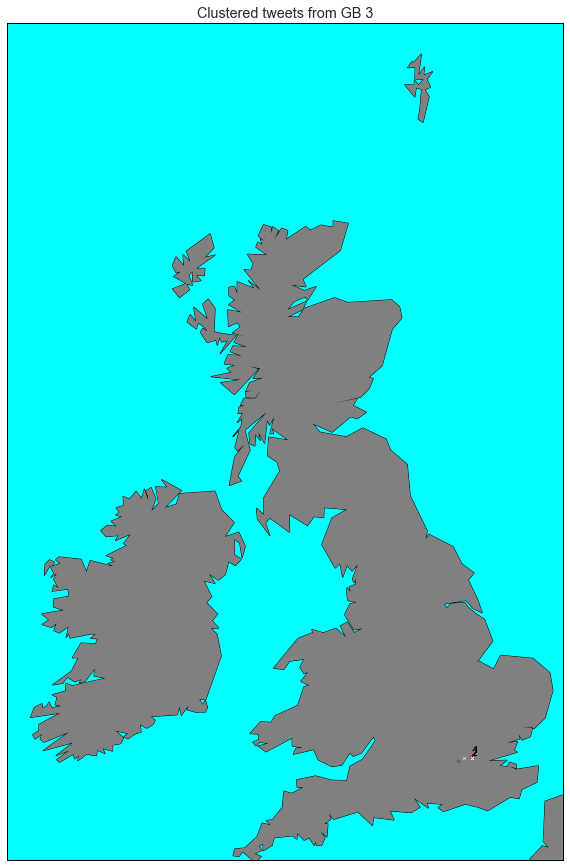

The number of clusters that were ignored because of quality issues is: 1
Making the Map took: 5.691885948181152
Method 2 took: 0.012234926223754883
start calculating
There were 2 out of 9 Tweets that were clustered as noise
This is 22.2222222222%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6251940727233887
There were 376 Tweets that were clustered as noise
Begin Analysis for next day
3 day Clustered. The passed time is: 0.006649971008300781
labelsMethod2_loc: 1000
start calculating
Method 2 took: 5.823183059692383
start calculating
1. Cluster, with 16 tweets, 15 distinct users.
This cluster is From: 03.07.2016 To: 03.07.2016
 
(51.498040679999995, -0.19324293000000001)
Location:  Royal Borough of Kensington and Chelsea,  London,  Greater London,  England
Most similar words:
['greater', 'london', 'harringay', 'hammersmith', 'funscape', 'kensington', '9¾', 'picturehouse', 'wdsa', 'aldgate']
 
The most freq. words are: 
[   ('lon

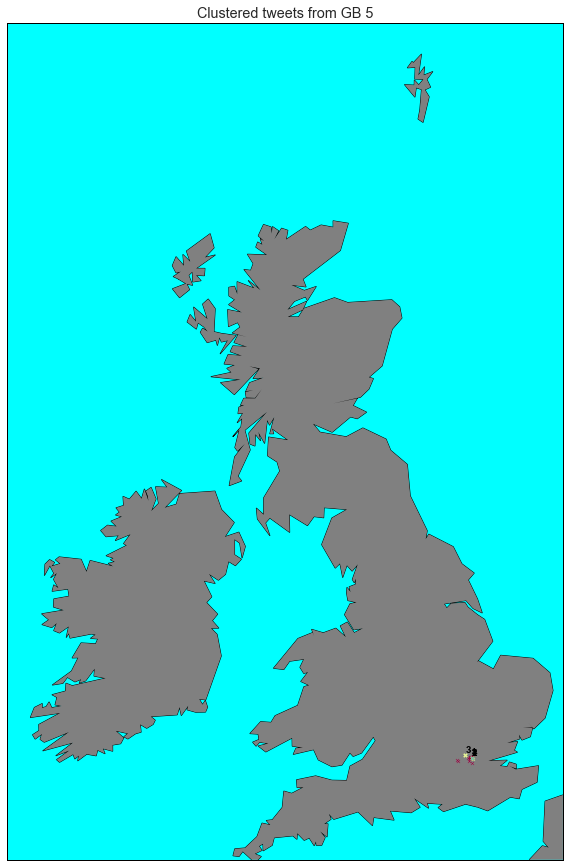

Making the Map took: 8.329549074172974
There were 404 Tweets that were clustered as noise
Begin Analysis for next day
4 day Clustered. The passed time is: 0.0063359737396240234
labelsMethod2_loc: 1000
start calculating
Method 2 took: 5.535801887512207
start calculating
1. Cluster, with 10 tweets, 10 distinct users.
This cluster is From: 04.07.2016 To: 04.07.2016
 
(51.492448346000003, -0.22052172799999997)
Location:  London Borough of Hammersmith and Fulham,  London,  Greater London,  England
Most similar words:
['london', 'greater', 'hammersmith', 'harringay', 'kensington', 'funscape', 'twickenham', 'picturehouse', '9¾', 'aldgate']
 
The most freq. words are: 
[   ('london', 21),
    ('greater', 10),
    ('hounslow', 3),
    ('city', 3),
    ('bridge', 3),
    ('bugün', 1),
    ('sarayı', 1),
    ('buckingham', 1),
    ('square', 1),
    ('westminster', 1)]
 
[   "I'm at Lambeth Bridge in Westminster, Greater London "
    'https://t.co/6ndLn3QBW7 https://t.co/xDGvWo9nt1',
    "I'm at 

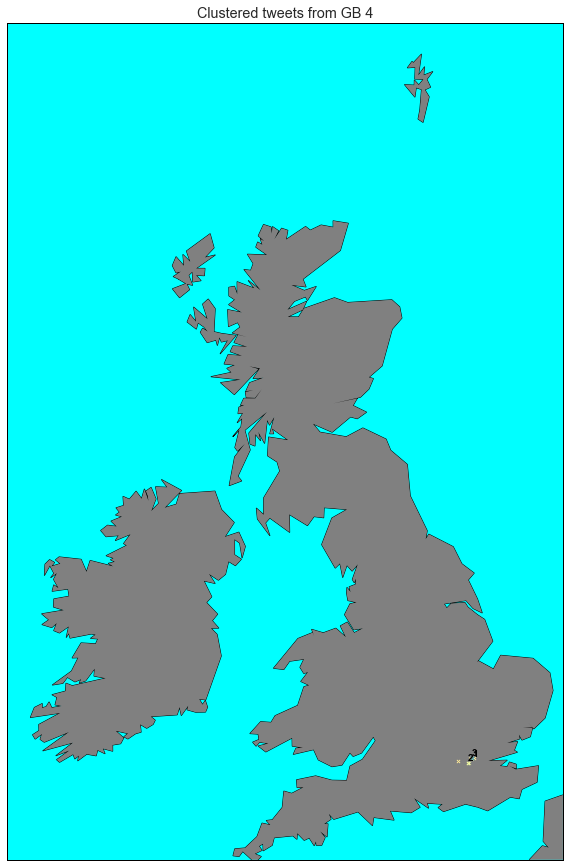

Making the Map took: 7.388653993606567
Method 2 took: 0.02194499969482422
start calculating
There were 5 out of 18 Tweets that were clustered as noise
This is 27.7777777778%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6078858375549316
There were 363 Tweets that were clustered as noise
Begin Analysis for next day
5 day Clustered. The passed time is: 0.012830018997192383
labelsMethod2_loc: 1000
start calculating
Method 2 took: 6.442264080047607
start calculating
1. Cluster, with 7 tweets, 7 distinct users.
This cluster is From: 05.07.2016 To: 05.07.2016
 
(51.478938097142859, -0.28227308428571424)
Location:  London Borough of Richmond upon Thames,  London,  Greater London,  England
Most similar words:
['london', 'greater', 'kensington', 'hammersmith', 'harringay', 'picturehouse', 'funscape', '9¾', 'hulme', 'wdsa']
 
The most freq. words are: 
[   ('london', 14),
    ('greater', 7),
    ('hounslow', 3),
    ('رجلي💔', 1),
    ('ba

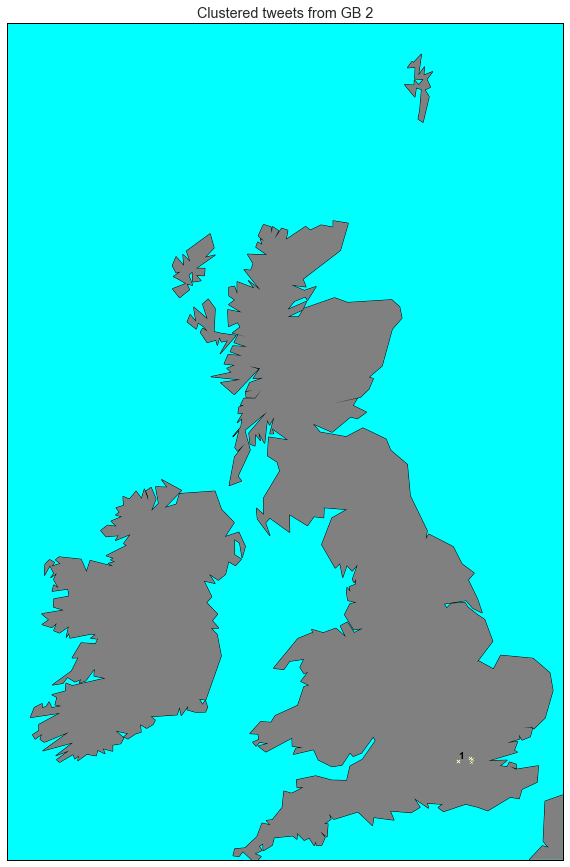

Making the Map took: 7.737945079803467
There were 333 Tweets that were clustered as noise
Begin Analysis for next day
6 day Clustered. The passed time is: 0.006777048110961914
labelsMethod2_loc: 1000
start calculating
Method 2 took: 4.480821847915649
start calculating
1. Cluster, with 14 tweets, 14 distinct users.
This cluster is From: 06.07.2016 To: 06.07.2016
 
(51.506789007857137, -0.1896143814285714)
Location:  Royal Borough of Kensington and Chelsea,  London,  Greater London,  England
Most similar words:
['london', 'greater', 'hammersmith', 'picturehouse', '9¾', 'aldgate', 'funscape', 'kensington', 'wdsa', 'harringay']
 
The most freq. words are: 
[   ('london', 32),
    ('greater', 15),
    ('market', 2),
    ('hounslow', 2),
    ('station', 2),
    ('wood', 1),
    ('puente', 1),
    ('centre', 1),
    ('lane', 1),
    ('bletchley', 1)]
 
[   "I'm at Puente de Westminster in London, Greater London "
    'https://t.co/UqnsG35Hua https://t.co/Yudw5i2okj',
    "I'm at Leadenhall Ma

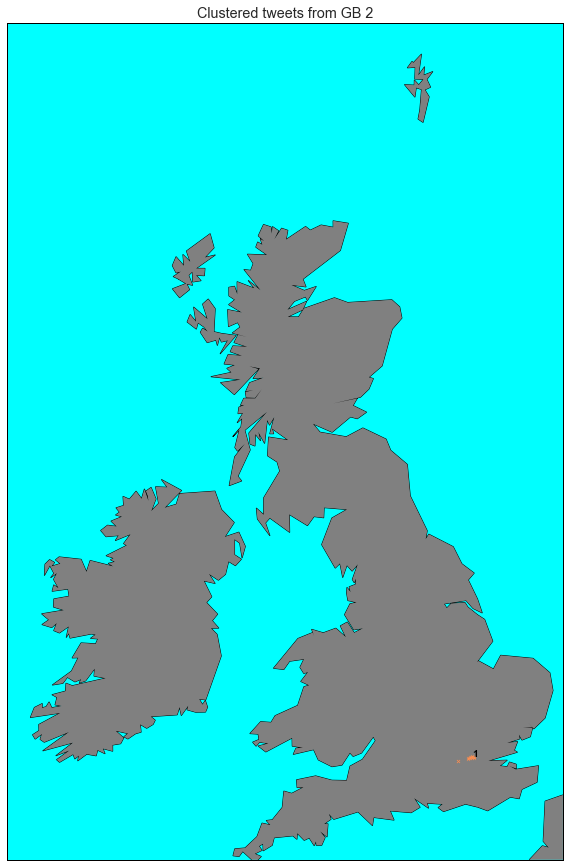

The number of clusters that were ignored because of quality issues is: 1
Making the Map took: 5.7335169315338135
Method 2 took: 0.01596212387084961
start calculating
There were 5 out of 15 Tweets that were clustered as noise
This is 33.3333333333%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6079611778259277
Method 2 took: 0.008231878280639648
start calculating
There were 3 out of 8 Tweets that were clustered as noise
This is 37.5%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5339698791503906
There were 310 Tweets that were clustered as noise
Begin Analysis for next day
7 day Clustered. The passed time is: 0.009199142456054688
labelsMethod2_loc: 1000
start calculating
Method 2 took: 6.059828042984009
start calculating
1. Cluster, with 6 tweets, 6 distinct users.
This cluster is From: 07.07.2016 To: 07.07.2016
 
(51.503909048333334, -0.18958306999999999)
Location:  Royal

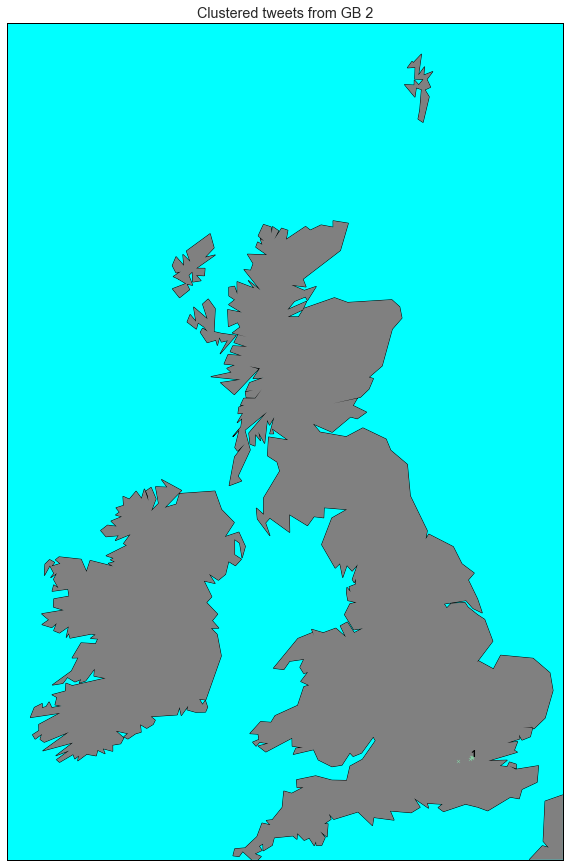

Making the Map took: 7.2707679271698
There were 287 Tweets that were clustered as noise
Begin Analysis for next day
9 day Clustered. The passed time is: 0.007135868072509766
labelsMethod2_loc: 1000
start calculating
Method 2 took: 3.8653271198272705
start calculating
1. Cluster, with 5 tweets, 5 distinct users.
This cluster is From: 09.07.2016 To: 09.07.2016
 
(51.507114860000001, -0.12731804999999999)
Location:  City of Westminster,  London,  Greater London,  England
Most similar words:
['kingdom', 'united…', 'paddington…', 'kindom', 'brockely', 'kingdom/', '#farewell', '#london', 'united', 'wonderground']
 
The most freq. words are: 
[   ('london', 6),
    ('kingdom', 5),
    ('united', 5),
    ('#london', 3),
    ('#guestbutler', 1),
    ('#9dejulio', 1),
    ('#arg', 1),
    ('#wellthatdeescalatedquickly', 1),
    ('#saturdaynightworking', 1),
    ('#argentina', 1)]
 
[   'LONDON EYE @ London, United Kingdom https://t.co/FZUHeo4V6X',
    '9 de julio #arg #argentina #9dejulio #londo

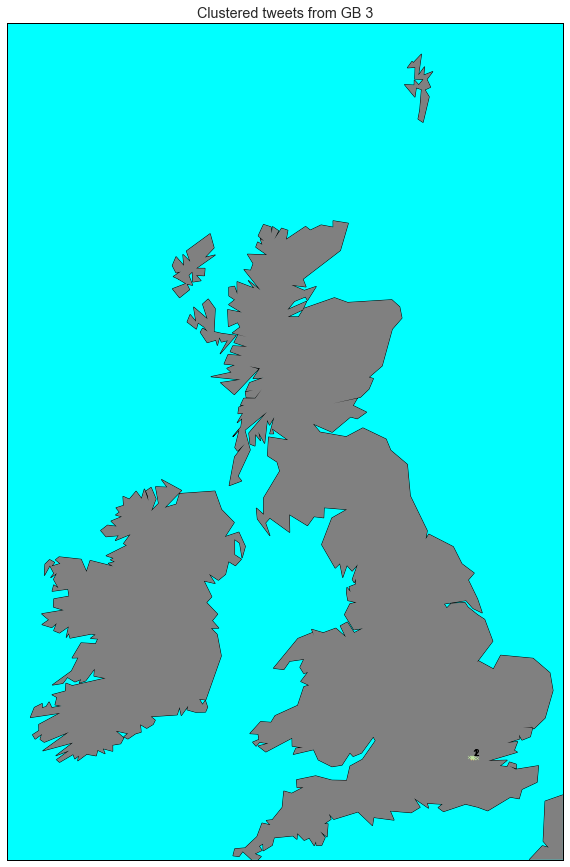

Making the Map took: 6.280753135681152
Method 2 took: 0.010332822799682617
start calculating
There were 4 out of 11 Tweets that were clustered as noise
This is 36.3636363636%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6000308990478516
Method 2 took: 0.017032146453857422
start calculating
1. Cluster, with 5 tweets, 5 distinct users.
This cluster is From: 09.07.2016 To: 09.07.2016
 
(52.070671751999996, -1.0253105120000001)
Location:  Lillingstone Dayrell with Luffield Abbey CP,  Aylesbury Vale,  Buckinghamshire,  South East
Most similar words:
['silverstone', 'f1', '#britishgp', 'gp2', 'racing', 'race', '#f1', 'prix', 'formula', 'gp']
 
The most freq. words are: 
[   ('prix', 5),
    ('grand', 5),
    ('racing', 4),
    ('silverstone', 4),
    ('formula', 4),
    ('british', 4),
    ('#britishgp', 3),
    ('#formula1', 1),
    ('f1#silverstone', 1),
    ('#silverstone', 1)]
 
[   'Jack at the #britishgp #goLewis @ Formula 1 Ra

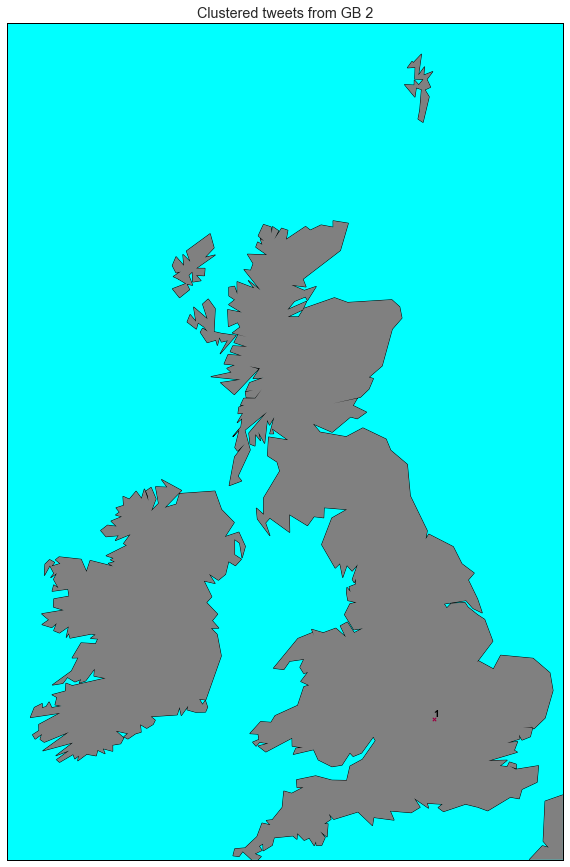

Making the Map took: 1.2835581302642822
There were 352 Tweets that were clustered as noise
Begin Analysis for next day
10 day Clustered. The passed time is: 0.009593963623046875
labelsMethod2_loc: 1000
start calculating
Method 2 took: 4.694047927856445
start calculating
1. Cluster, with 6 tweets, 6 distinct users.
This cluster is From: 10.07.2016 To: 10.07.2016
 
(51.508450671666672, -0.15865265833333334)
Location:  City of Westminster,  London,  Greater London,  England
Most similar words:
['hyde', '#serpentine…', 'summer', '#bsthydepark', '#dancebot', 'florence', 'barclaycard', 'bsthydepark', 'festival', 'silverstone']
 
The most freq. words are: 
[   ('park', 6),
    ('british', 6),
    ('time', 6),
    ('hyde', 6),
    ('summer', 6),
    ('lines', 1),
    ('barclaycard', 1),
    ('thorns', 1),
    ('rose', 1),
    ('pharrell', 1)]
 
[   'BLURRED LINES ☄☄☄ @ British Summer Time, Hyde Park '
    'https://t.co/PqjuhRaGP0',
    'A rose between two thorns #britishsummertime @ British Su

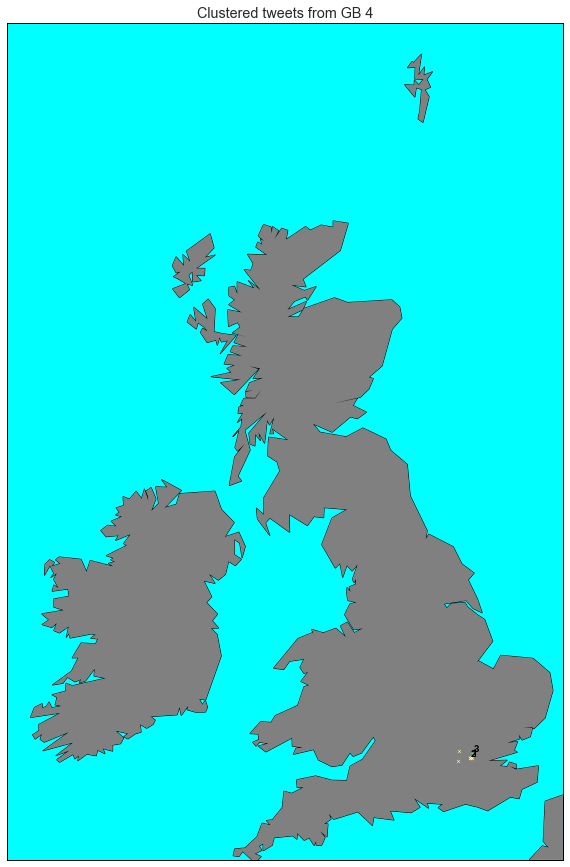

Making the Map took: 6.4409339427948
There were 332 Tweets that were clustered as noise
Begin Analysis for next day
11 day Clustered. The passed time is: 0.00917816162109375
labelsMethod2_loc: 1000
start calculating
Method 2 took: 6.038855075836182
start calculating
1. Cluster, with 9 tweets, 9 distinct users.
This cluster is From: 11.07.2016 To: 11.07.2016
 
(51.507114860000001, -0.12731804999999999)
Location:  City of Westminster,  London,  Greater London,  England
Most similar words:
['kingdom', 'united…', 'kindom', 'united', 'kingdom/', 'paddington…', 'brockely', '#farewell', '59.0', 'karpet']
 
The most freq. words are: 
[   ('london', 9),
    ('kingdom', 9),
    ('united', 9),
    ('#trust', 2),
    ('#morningbreakfast', 1),
    ('#melt', 1),
    ('desfoca-me', 1),
    ('#live', 1),
    ('good', 1),
    ('#erlee⌚️', 1)]
 
[   '#melt @ London, United Kingdom https://t.co/TmXCvaFjCW',
    'Desfoca-me. @ London, United Kingdom https://t.co/72TkXk9frM',
    '📞 @ London, United Kingdo

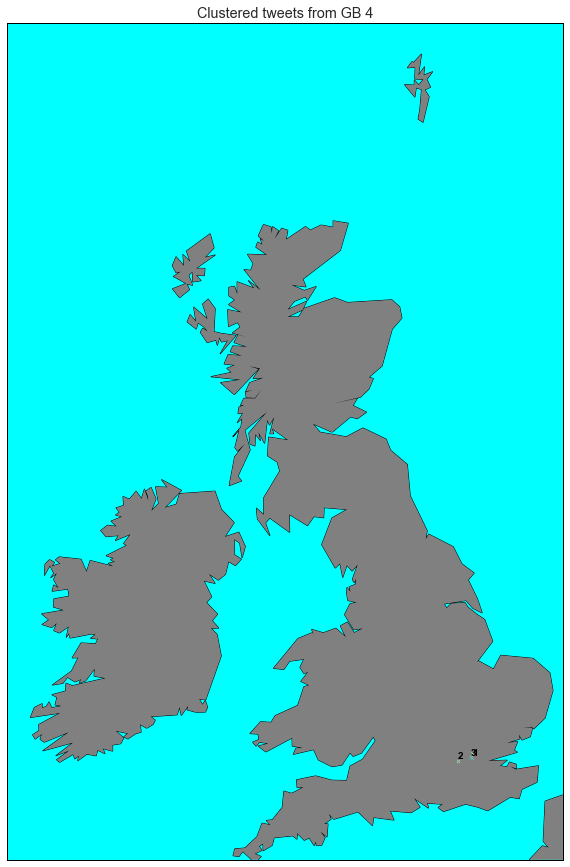

Making the Map took: 7.827581882476807
Method 2 took: 0.033820152282714844
start calculating
1. Cluster, with 5 tweets, 5 distinct users.
This cluster is From: 11.07.2016 To: 11.07.2016
 
(52.53207295, -1.8566821600000001)
Location:  Short Heath,  Birmingham,  West Midlands,  England
Most similar words:
['t-shirts', 'hoodies', 'bracelets', 'shirts', 'embroidered', '19.99', 'prints', 'leather', 'personalised', 'necklaces']
 
The most freq. words are: 
[   ('images', 5),
    ('shirts', 5),
    ('polo', 5),
    ('t-shirts', 5),
    ('cases', 5),
    ('canvas', 5),
    ('hoodies', 5),
    ('cushions', 5),
    ('personalised', 5),
    ('phone/tablet', 5)]
 
[   'Personalised Mugs,Canvas,Phone/Tablet '
    'Cases,Hoodies,T-Shirts,Sweatshirts,Polo Shirts,Cushions And More! Any '
    'Images https://t.co/uG7PPKqYUj',
    'Personalised Mugs,Canvas,Phone/Tablet '
    'Cases,Hoodies,T-Shirts,Sweatshirts,Polo Shirts,Cushions And More! Any '
    'Images https://t.co/l1x5ZGijj9',
    'Personalised M

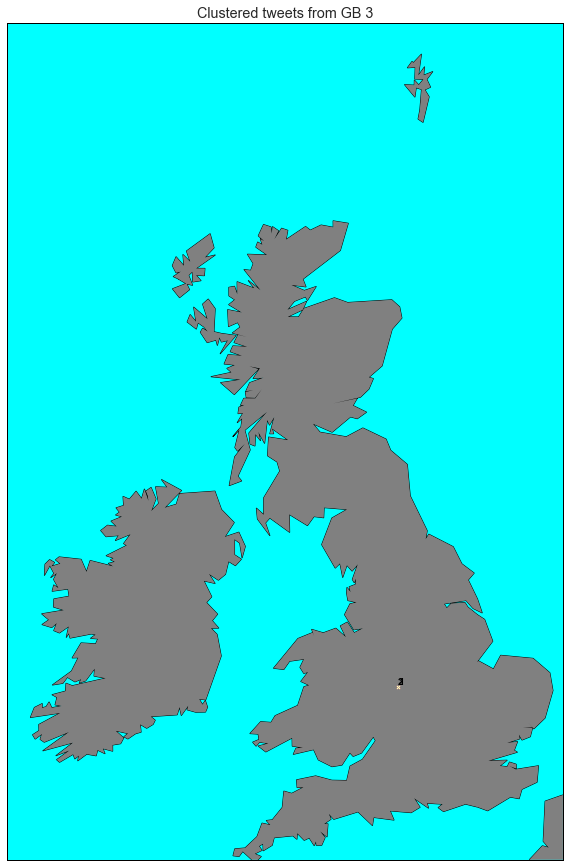

Making the Map took: 1.5193800926208496
Method 2 took: 0.0264129638671875
start calculating
There were 1 out of 20 Tweets that were clustered as noise
This is 5.0%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6114730834960938
There were 330 Tweets that were clustered as noise
Begin Analysis for next day
1 day Clustered. The passed time is: 0.018368005752563477
labelsMethod2_loc: 2000
start calculating
Method 2 took: 20.985849142074585
start calculating
1. Cluster, with 8 tweets, 4 distinct users.
This cluster is From: 01.07.2016 To: 01.07.2016
 
(51.501904878750011, -0.11701539375000002)
Location:  London Borough of Lambeth,  London,  Greater London,  England
Most similar words:
['waterloo', 'london', 'aldgate', 'blackfriars', '#ww1centenary', 'brunel', '#waterloo', 'hammersmith', 'croydon', '#rememberthesomme']
 
The most freq. words are: 
[   ('london', 8),
    ('station', 8),
    ('#london', 7),
    ('waterloo', 7),
    ('#w

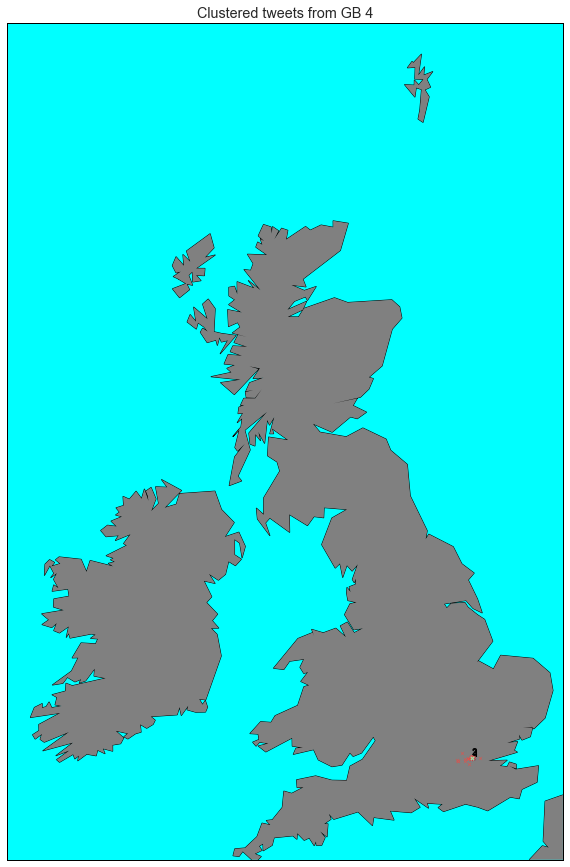

The number of clusters that were ignored because of quality issues is: 1
Making the Map took: 22.766185998916626
Method 2 took: 0.08077788352966309
start calculating
1. Cluster, with 7 tweets, 3 distinct users.
This cluster is From: 01.07.2016 To: 01.07.2016
 
(55.847674701428573, -4.2415380642857139)
Location:  Ballater Street,  Hutchesontown,  Glasgow City,  Scotland
Most similar words:
['eastbound', 'westbound', 'southbound', 'haggs', 'lanes', 'northbound', 'j14', 'bankhead', 'j23', 'a282']
 
The most freq. words are: 
[   ('queue', 7),
    ('restricted', 7),
    ('indefinitely', 7),
    ('lanes', 7),
    ('southbound', 3),
    ('#road', 3),
    ('slips', 2),
    ('westbound', 2),
    ('eastbound', 2),
    ('fullarton', 1)]
 
[   '#Road ^ M8 J19 Clydeside Expressway - Queue: 3 lanes restricted Eastbound '
    'indefinitely https://t.co/rUd61vp0i7',
    '#Road ^ M77 J1 Between Slips - Queue: 2 lanes restricted Southbound '
    'indefinitely https://t.co/6JJ8l6B24i',
    'M8 J24 W - E

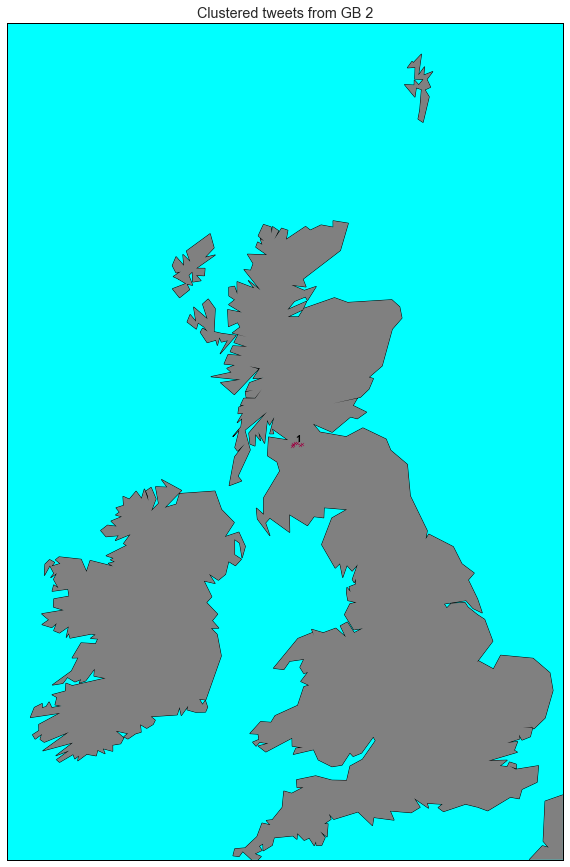

Making the Map took: 1.2960758209228516
Method 2 took: 0.0845479965209961
start calculating
There were 4 out of 39 Tweets that were clustered as noise
This is 10.2564102564%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.630159854888916
Method 2 took: 0.2878260612487793
start calculating
There were 63 out of 74 Tweets that were clustered as noise
This is 85.1351351351%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.7929680347442627
Method 2 took: 0.025463104248046875
start calculating
1. Cluster, with 5 tweets, 4 distinct users.
This cluster is From: 01.07.2016 To: 01.07.2016
 
(51.537521399999989, -0.89976999999999996)
Location:  Remenham CP,  Wokingham,  South East,  England
Most similar words:
['henley', 'regatta', 'royal', '#henleyregatta', '#henley2016', 'botanic…', '#regatta', 'of…', '#rowing', 'thames']
 
The most freq. words are: 
[   ('henley', 5),
    ('royal', 5)

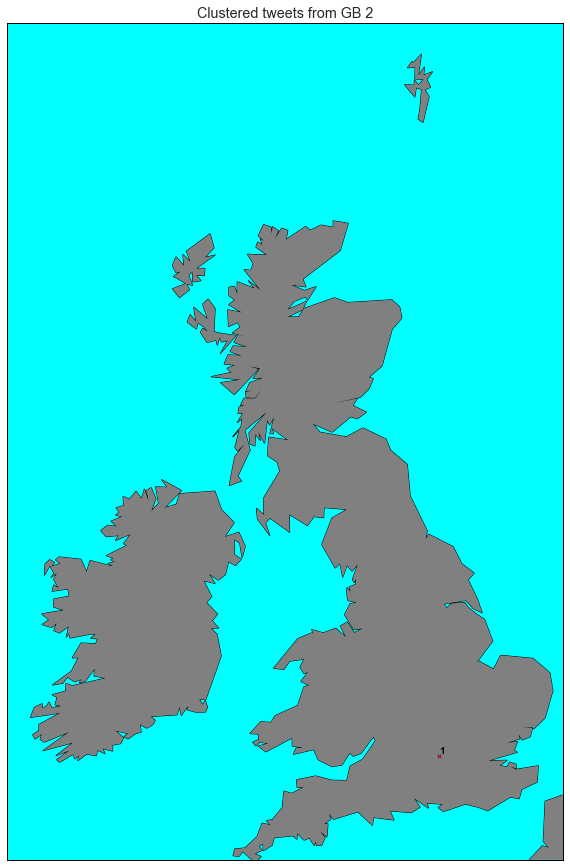

Making the Map took: 1.2523260116577148
There were 430 Tweets that were clustered as noise
Begin Analysis for next day
2 day Clustered. The passed time is: 0.014320135116577148
labelsMethod2_loc: 2000
start calculating
Method 2 took: 18.123955011367798
start calculating
1. Cluster, with 12 tweets, 12 distinct users.
This cluster is From: 02.07.2016 To: 02.07.2016
 
(51.508104265000007, -0.15893904999999994)
Location:  City of Westminster,  London,  Greater London,  England
Most similar words:
['hyde', 'barclaycard', '#serpentine…', '#britishsummertime', 'bsthydepark', '#bsthydepark', '#bst', '#dancebot', 'hyde…', 'festival']
 
The most freq. words are: 
[   ('park', 12),
    ('hyde', 12),
    ('british', 10),
    ('summertime', 6),
    ('time', 5),
    ('summer', 4),
    ('festival', 3),
    ('#bst', 2),
    ('florence', 2),
    ('kendrick', 2)]
 
[   'Rainbow ladz 🌈 #britishsummertime #bst @ British Summer Time, Hyde Park '
    'https://t.co/VIl9o7U8xX',
    "At the Hyde Park Festival

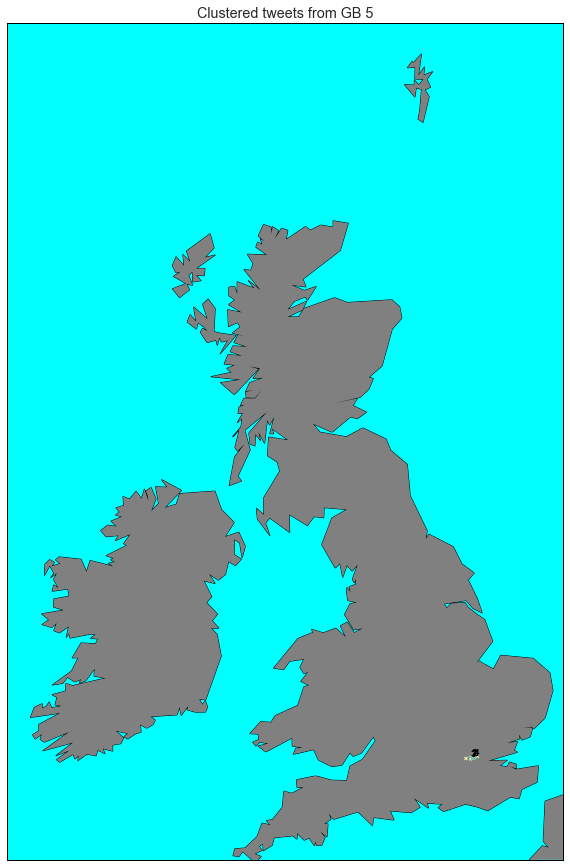

Making the Map took: 20.09125781059265
Method 2 took: 1.1047439575195312
start calculating
There were 140 out of 146 Tweets that were clustered as noise
This is 95.8904109589%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 1.6131958961486816
Method 2 took: 0.017431974411010742
start calculating
There were 9 out of 16 Tweets that were clustered as noise
This is 56.25%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5454308986663818
Method 2 took: 0.03742194175720215
start calculating
1. Cluster, with 8 tweets, 8 distinct users.
This cluster is From: 02.07.2016 To: 02.07.2016
 
(51.542678325000004, -0.89672965750000011)
Location:  Remenham CP,  Remenham,  Wokingham,  South East
Most similar words:
['henley', 'regatta', '#henleyregatta', '#henley2016', 'aquathlon', '#rowing', 'of…', '#henley', '#regatta', '#henleyonthames']
 
The most freq. words are: 
[   ('henley', 12),
    ('r

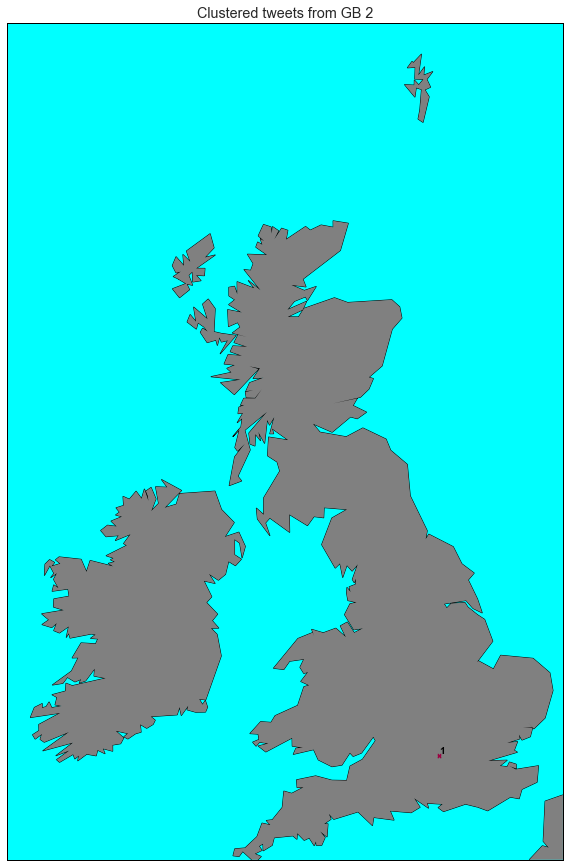

Making the Map took: 1.5178320407867432
There were 506 Tweets that were clustered as noise
Begin Analysis for next day
3 day Clustered. The passed time is: 0.01834392547607422
labelsMethod2_loc: 2000
start calculating
Method 2 took: 24.673003911972046
start calculating
1. Cluster, with 16 tweets, 16 distinct users.
This cluster is From: 03.07.2016 To: 03.07.2016
 
(51.508020856875, -0.15890673312499998)
Location:  City of Westminster,  London,  Greater London,  England
Most similar words:
['bsthydepark', 'hyde', '#britishsummertime', 'barclaycard', '#bst', '#serpentine…', '#bsthydepark', '#britishsummertimehydepark', '#hydepark', '#britishsummertime…']
 
The most freq. words are: 
[   ('park', 15),
    ('hyde', 15),
    ('british', 13),
    ('summertime', 12),
    ('#hydepark', 4),
    ('bsthydepark', 4),
    ('#bst', 3),
    ('#caroleking', 3),
    ('king', 3),
    ('barclaycard', 3)]
 
[   'king kunta #kendricklamar #BSThydepark #kamgigs @ Hyde Park - British '
    'Summertime https:

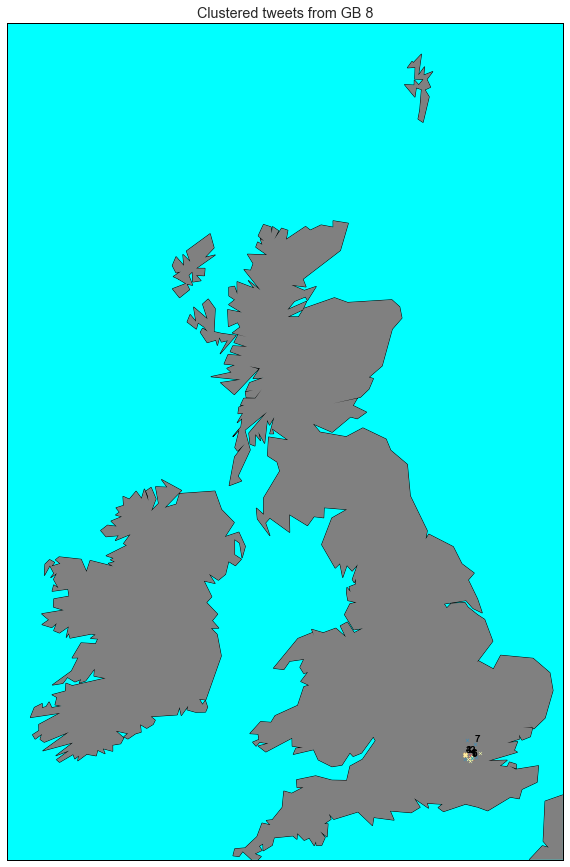

Making the Map took: 28.010201930999756
Method 2 took: 0.015992164611816406
start calculating
There were 3 out of 13 Tweets that were clustered as noise
This is 23.0769230769%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5857479572296143
There were 502 Tweets that were clustered as noise
Begin Analysis for next day
4 day Clustered. The passed time is: 0.01996779441833496
labelsMethod2_loc: 2000
start calculating
Method 2 took: 24.506800889968872
start calculating
1. Cluster, with 18 tweets, 3 distinct users.
This cluster is From: 04.07.2016 To: 04.07.2016
 
(51.506300000000003, -0.12709999999999999)
Location:  City of Westminster,  London,  Greater London,  England
Most similar words:
['#trndnl', 'trends', 'topic', '814', 'trending', '5pt', 'gradireland', '19%(sample', '40%twitter', 'sheeplands']
 
The most freq. words are: 
[   ('#trndnl', 18),
    ('trends', 11),
    ('trending', 11),
    ('topic', 7),
    ('alert', 6),
    (

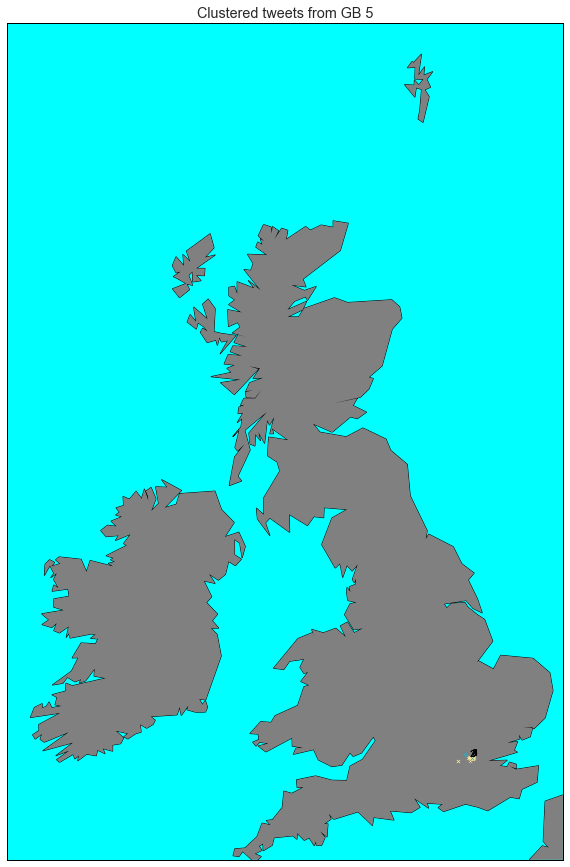

Making the Map took: 26.511456966400146
Method 2 took: 0.007289886474609375
start calculating
There were 3 out of 9 Tweets that were clustered as noise
This is 33.3333333333%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5229878425598145
Method 2 took: 0.03589987754821777
start calculating
There were 4 out of 25 Tweets that were clustered as noise
This is 16.0%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5634078979492188
There were 443 Tweets that were clustered as noise
Begin Analysis for next day
5 day Clustered. The passed time is: 0.01659417152404785
labelsMethod2_loc: 2000
start calculating
Method 2 took: 22.626883029937744
start calculating
1. Cluster, with 34 tweets, 32 distinct users.
This cluster is From: 05.07.2016 To: 05.07.2016
 
(51.502426230588242, -0.17719149676470586)
Location:  City of Westminster,  London,  Greater London,  England
Most similar words:


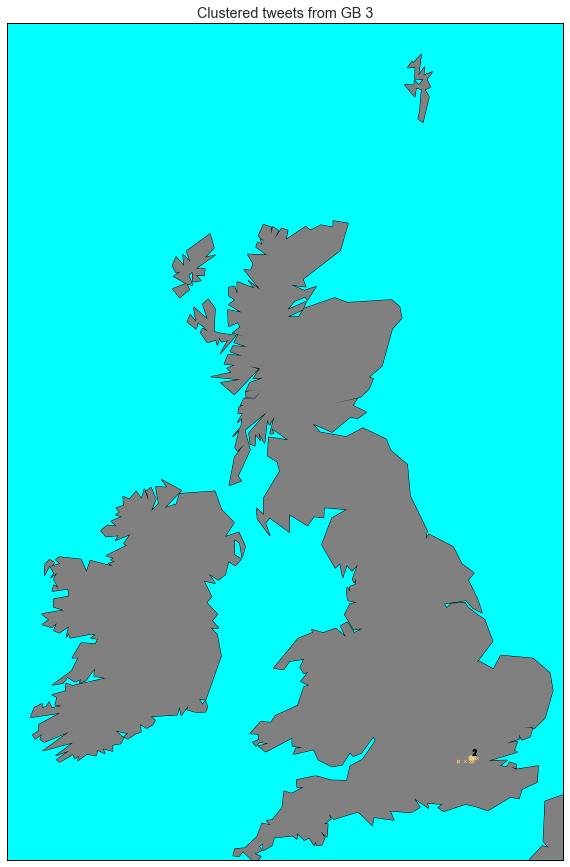

The number of clusters that were ignored because of quality issues is: 1
Making the Map took: 24.207463026046753
Method 2 took: 0.04840707778930664
start calculating
There were 24 out of 29 Tweets that were clustered as noise
This is 82.7586206897%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5549061298370361
Method 2 took: 0.007811069488525391
start calculating
There were 4 out of 10 Tweets that were clustered as noise
This is 40.0%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5304000377655029
Method 2 took: 0.025614023208618164
start calculating
There were 17 out of 22 Tweets that were clustered as noise
This is 77.2727272727%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5658190250396729
There were 451 Tweets that were clustered as noise
Begin Analysis for next day
6 day Clustered. The passed time is: 0.014159

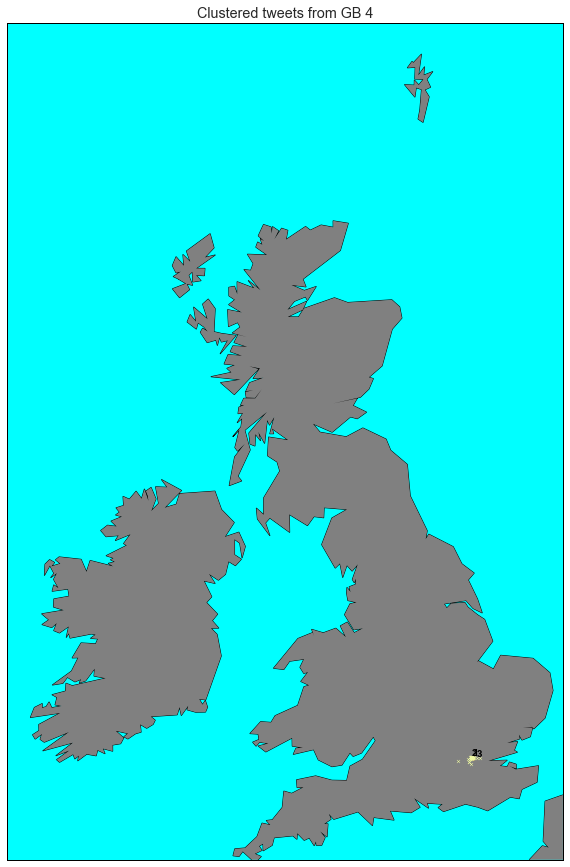

The number of clusters that were ignored because of quality issues is: 1
Making the Map took: 23.84167790412903
Method 2 took: 0.07373595237731934
start calculating
There were 9 out of 36 Tweets that were clustered as noise
This is 25.0%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6113150119781494
Method 2 took: 0.4042501449584961
start calculating
1. Cluster, with 10 tweets, 10 distinct users.
This cluster is From: 06.07.2016 To: 06.07.2016
 
(53.456874487999997, -2.2871150440000001)
Location:  Trafford,  Greater Manchester,  North West England,  England
Most similar words:
['trafford', 'emirates', 'stadium', 'wembley', 'newcastle', 'trafford…', 'ground', 'goodison', 'sunderland', 'stoke']
 
The most freq. words are: 
[   ('cricket', 10),
    ('trafford', 10),
    ('ground', 10),
    ('emirates', 6),
    ('#formationworldtour', 4),
    ('hold', 2),
    ('#beyonce', 2),
    ('b👑🐝💛', 1),
    ('beyonce', 1),
    ('🐝👌🏻😍', 1)]
 
[

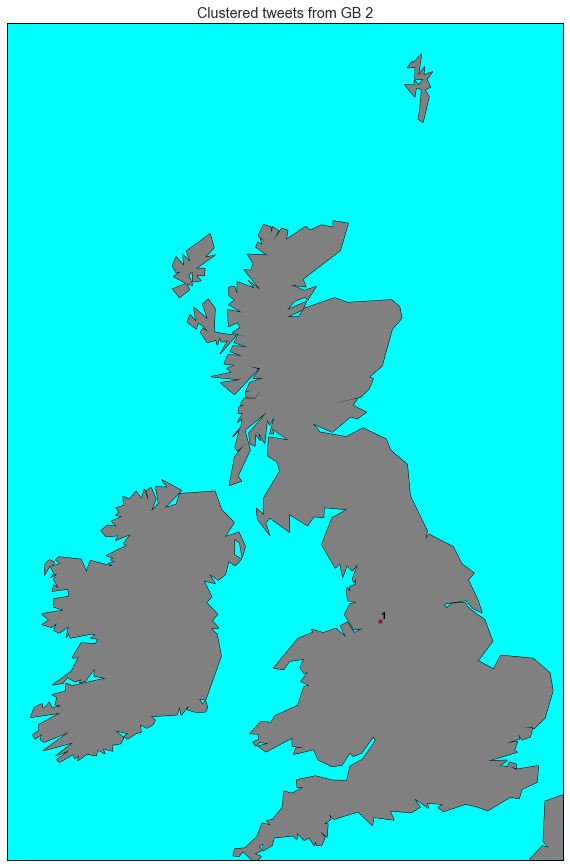

Making the Map took: 1.7150471210479736
Method 2 took: 0.1071939468383789
start calculating
There were 38 out of 44 Tweets that were clustered as noise
This is 86.3636363636%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6546149253845215
There were 483 Tweets that were clustered as noise
Begin Analysis for next day
7 day Clustered. The passed time is: 0.017044782638549805
labelsMethod2_loc: 2000
start calculating
Method 2 took: 26.54953908920288
start calculating
1. Cluster, with 22 tweets, 20 distinct users.
This cluster is From: 07.07.2016 To: 07.07.2016
 
(51.509117703181808, -0.17584939863636362)
Location:  City of Westminster,  London,  Greater London,  England
Most similar words:
['london', 'greater', 'hammersmith', 'wdsa', 'picturehouse', 'aldgate', 'kensington', 'birmingham', '9¾', 'harringay']
 
The most freq. words are: 
[   ('london', 46),
    ('greater', 22),
    ('station', 5),
    ('hounslow', 3),
    ('underground

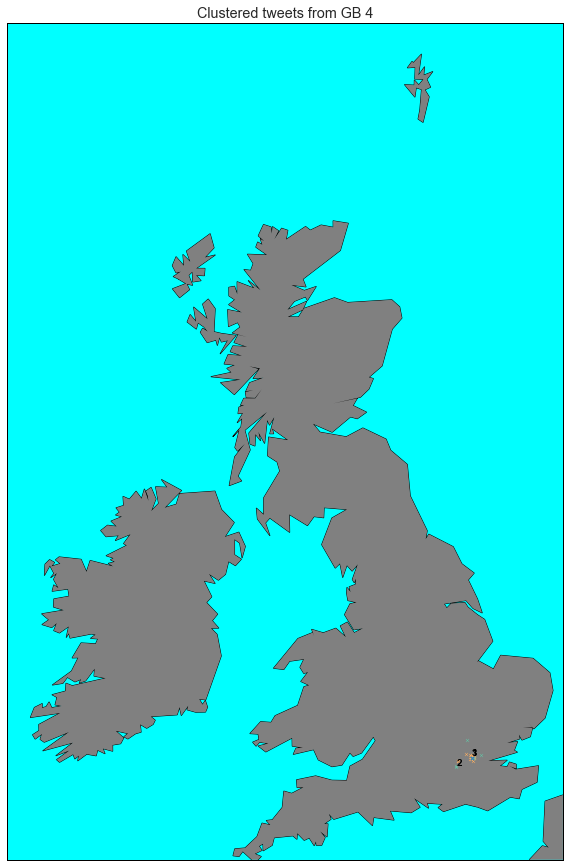

Making the Map took: 28.42637801170349
Method 2 took: 0.11569094657897949
start calculating
There were 40 out of 47 Tweets that were clustered as noise
This is 85.1063829787%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6257939338684082
Method 2 took: 0.13196802139282227
start calculating
1. Cluster, with 5 tweets, 5 distinct users.
This cluster is From: 07.07.2016 To: 07.07.2016
 
(52.532112169999991, -1.8566373999999999)
Location:  Short Heath,  Birmingham,  West Midlands,  England
Most similar words:
['another', 'long', 'office', 'second', 'early', 'back', 'every', 'one', 'third', 'rest']
 
The most freq. words are: 
[('long', 5), ('another', 5), ('office', 5)]
 
[   'Another long day at the office! https://t.co/vMmDsAWpdU',
    'Another long day at the office! https://t.co/t0Cg0dKTJp',
    'Another long day at the office! https://t.co/xZWYjna5L6',
    'Another long day at the office! https://t.co/KJ3sdELAed',
    'Another l

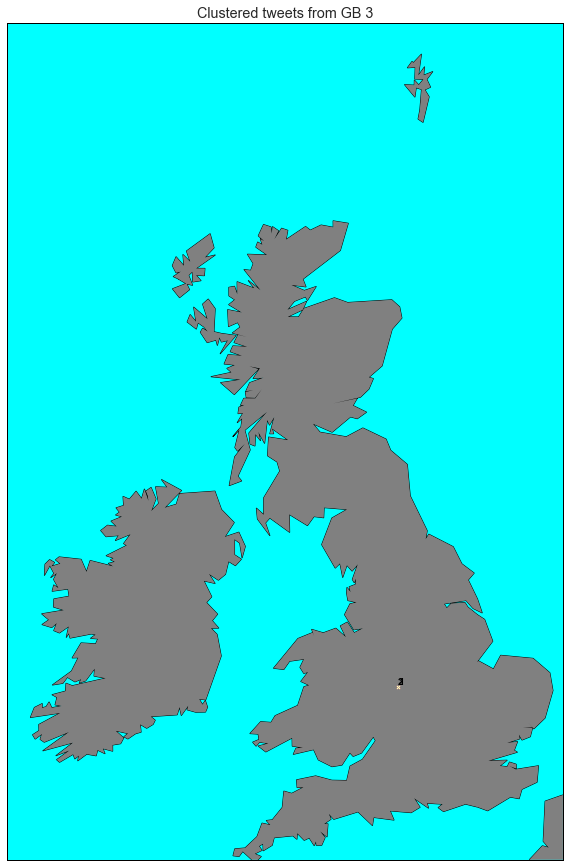

Making the Map took: 1.5784938335418701
Method 2 took: 0.01749110221862793
start calculating
There were 7 out of 17 Tweets that were clustered as noise
This is 41.1764705882%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6227500438690186
Method 2 took: 0.07109498977661133
start calculating
There were 26 out of 34 Tweets that were clustered as noise
This is 76.4705882353%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6252319812774658
Method 2 took: 0.04598689079284668
start calculating
There were 4 out of 26 Tweets that were clustered as noise
This is 15.3846153846%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6276018619537354
There were 409 Tweets that were clustered as noise
Begin Analysis for next day
9 day Clustered. The passed time is: 0.014167070388793945
labelsMethod2_loc: 2000
start calculating
Method 2 too

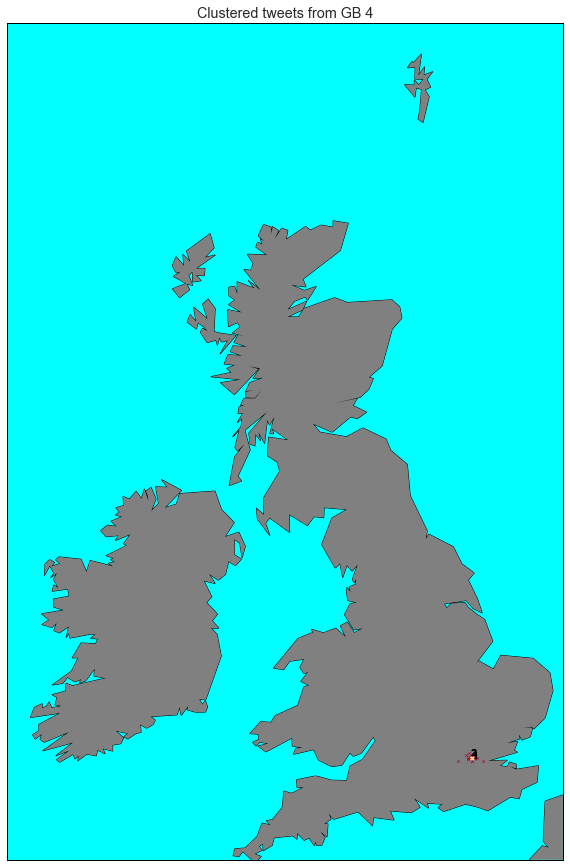

The number of clusters that were ignored because of quality issues is: 1
Making the Map took: 22.676753044128418
Method 2 took: 0.25545597076416016
start calculating
1. Cluster, with 5 tweets, 4 distinct users.
This cluster is From: 09.07.2016 To: 09.07.2016
 
(53.360702163999996, -6.2514807660000002)
Location:  Ballybough B ED,  Dublin,  County Dublin,  Leinster
Most similar words:
['wembley', 'stadium', 'principality', 'croke', 'croker', 'beyonce', 'millennium', 'etihad', '23:50', 'beyoncé']
 
The most freq. words are: 
[   ('park', 5),
    ('croke', 5),
    ('stadium', 5),
    ('#beyonceformationtour', 2),
    ('beyoncé', 1),
    ('stage', 1),
    ('#queenbey', 1),
    ('#crokepark', 1),
    ('#notactuallygoing', 1),
    ('#kindawouldntmindgoing', 1)]
 
[   '#queenbey #croker #notactuallygoing #kindawouldntmindgoing @ Croke Park '
    'Stadium, Dublin https://t.co/nrMzwg5aZf',
    'Seriously.. The screens!! #beyonceformationtour @ Croke Park Stadium '
    'https://t.co/oFqqP1S5C7',


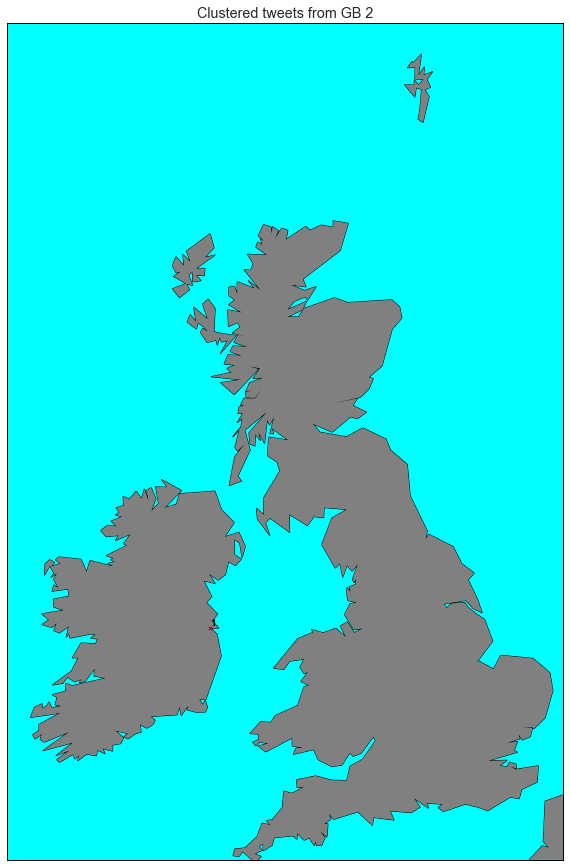

Making the Map took: 1.864306926727295
Method 2 took: 0.05146002769470215
start calculating
There were 21 out of 27 Tweets that were clustered as noise
This is 77.7777777778%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.8282511234283447
Method 2 took: 0.0557711124420166
start calculating
There were 7 out of 33 Tweets that were clustered as noise
This is 21.2121212121%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6553189754486084
There were 484 Tweets that were clustered as noise
Begin Analysis for next day
10 day Clustered. The passed time is: 0.014796018600463867
labelsMethod2_loc: 2000
start calculating
Method 2 took: 0.08399009704589844
start calculating
1. Cluster, with 5 tweets, 5 distinct users.
This cluster is From: 10.07.2016 To: 10.07.2016
 
(52.069794807999997, -1.0236636319999999)
Location:  Lillingstone Dayrell with Luffield Abbey CP,  Aylesbury Vale,  Bucki

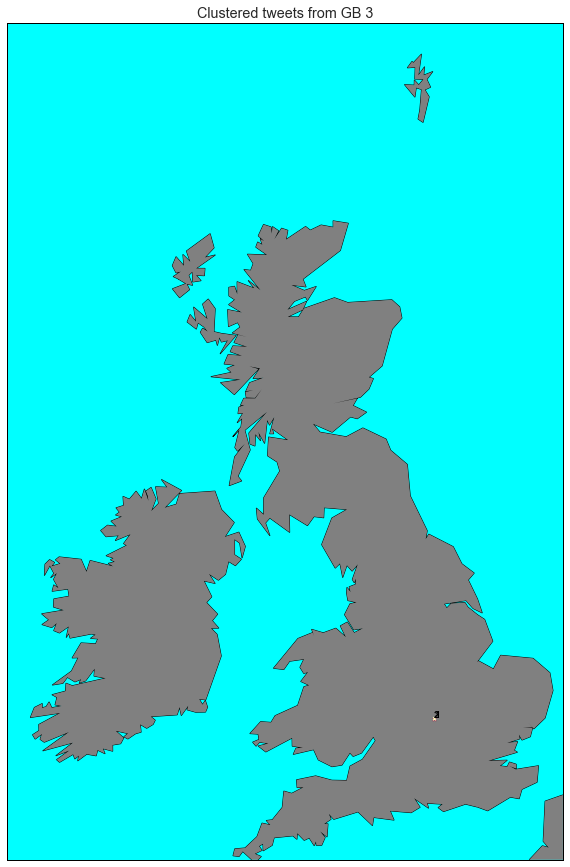

Making the Map took: 1.6492550373077393
Method 2 took: 19.10357904434204
start calculating
1. Cluster, with 25 tweets, 23 distinct users.
This cluster is From: 10.07.2016 To: 10.07.2016
 
(51.506470556000004, -0.16004833800000001)
Location:  City of Westminster,  London,  Greater London,  England
Most similar words:
['london', 'greater', 'hammersmith', 'harringay', 'kensington', 'picturehouse', '9¾', 'aldgate', 'wdsa', 'funscape']
 
The most freq. words are: 
[   ('london', 48),
    ('greater', 26),
    ('hounslow', 3),
    ('street', 3),
    ('hotel', 2),
    ('greenwich', 2),
    ('station', 2),
    ('park', 2),
    ('soho', 2),
    ('juice', 1)]
 
[   "I'm at @MMsWorldStores in London, Greater London https://t.co/G13HfZixV7",
    "I'm at @StarbucksUk in London, Greater London https://t.co/n6aW2b93W9",
    "I'm at Victoria Coach Station in London, Greater London "
    'https://t.co/pobxWNoQt6',
    '#FoodiesFestival (@ Greenwich Park in Greenwich, Greater London) '
    'https://t.co/

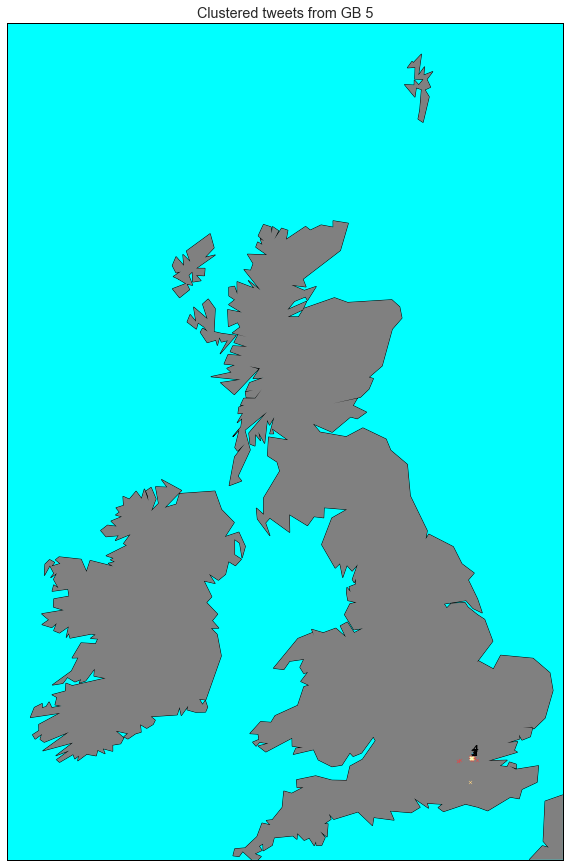

Making the Map took: 21.149861097335815
Method 2 took: 0.3154170513153076
start calculating
1. Cluster, with 5 tweets, 5 distinct users.
This cluster is From: 10.07.2016 To: 10.07.2016
 
(53.361820697999995, -6.2488033359999999)
Location:  Clonliffe East,  Dublin,  County Dublin,  Leinster
Most similar words:
['wembley', 'beyonce', 'beyoncé', '#beyonce', 'bey', '#formationworldtour', 'croke', 'concert', '#beyoncedublin', '🐝🐝🐝😍😍']
 
The most freq. words are: 
[   ('croke', 5),
    ('beyonce', 5),
    ('park', 5),
    ('tour', 4),
    ('formation', 4),
    ('world', 4),
    ('#beyonce', 3),
    ('queen', 2),
    ('beyoncé', 1),
    ('#theformationworldtour', 1)]
 
[   'BEYONCÉ WAS A DREAM 🍋 @ Beyonce Formation World Tour Croke Park '
    'https://t.co/MRVWAVYUnd',
    'Grande beyonce! #theformationworldtour #ISlay #beyonce #dublin @ Croke '
    'Park Stadium https://t.co/RdrQqRtVVz',
    '#beyonceformationtour #beyonce #queenbey 😍😍😍😍🐝🐝🐝🐝 @ Beyonce Formation '
    'World Tour Croke Park h

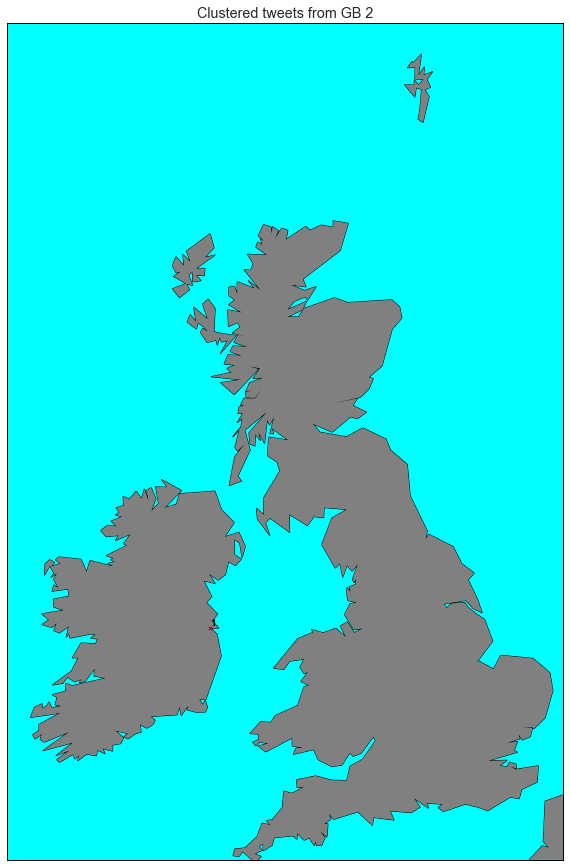

Making the Map took: 1.7363688945770264
There were 436 Tweets that were clustered as noise
Begin Analysis for next day
11 day Clustered. The passed time is: 0.01893901824951172
labelsMethod2_loc: 2000
start calculating
Method 2 took: 22.86073899269104
start calculating
1. Cluster, with 18 tweets, 16 distinct users.
This cluster is From: 11.07.2016 To: 11.07.2016
 
(51.507114860000001, -0.12731804999999999)
Location:  City of Westminster,  London,  Greater London,  England
Most similar words:
['kingdom', 'united…', 'kindom', 'united', 'kingdom/', 'paddington…', 'brockely', '#farewell', 'karpet', '59.0']
 
The most freq. words are: 
[   ('kingdom', 18),
    ('united', 18),
    ('london', 18),
    ('#london', 3),
    ('#trust', 2),
    ('#streetmessages', 1),
    ('#r3deye👣', 1),
    ('school', 1),
    ('#cristinaf', 1),
    ('#p4vel', 1)]
 
[   'morning! #streetmessages #placemaking #creativeplacemaking #London #willy '
    '@ London, United Kingdom https://t.co/xItaGBpekS',
    '☕️ time

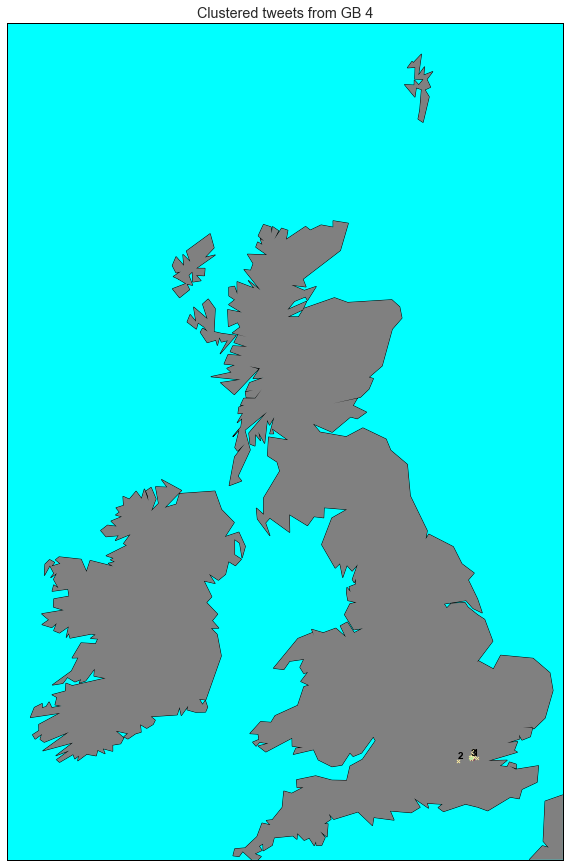

The number of clusters that were ignored because of quality issues is: 1
Making the Map took: 24.770393133163452
Method 2 took: 0.0637509822845459
start calculating
There were 19 out of 29 Tweets that were clustered as noise
This is 65.5172413793%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6896779537200928
Method 2 took: 0.1100759506225586
start calculating
1. Cluster, with 5 tweets, 5 distinct users.
This cluster is From: 11.07.2016 To: 11.07.2016
 
(52.53207295, -1.8566821600000001)
Location:  Short Heath,  Birmingham,  West Midlands,  England
Most similar words:
['t-shirts', 'hoodies', 'bracelets', 'shirts', 'embroidered', '19.99', 'prints', 'leather', 'personalised', 'necklaces']
 
The most freq. words are: 
[   ('images', 5),
    ('shirts', 5),
    ('polo', 5),
    ('t-shirts', 5),
    ('cases', 5),
    ('canvas', 5),
    ('hoodies', 5),
    ('cushions', 5),
    ('personalised', 5),
    ('phone/tablet', 5)]
 
[   'Person

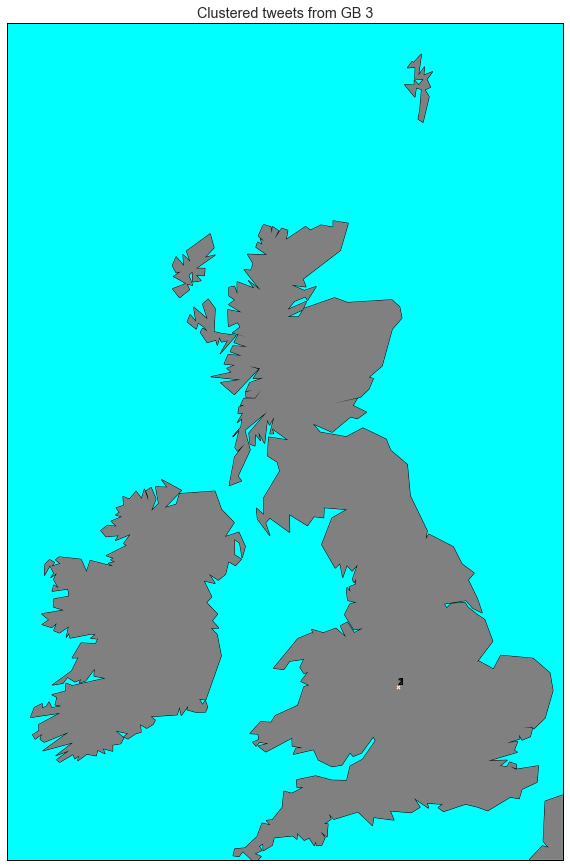

Making the Map took: 1.726956844329834
Method 2 took: 0.3811988830566406
start calculating
There were 77 out of 82 Tweets that were clustered as noise
This is 93.9024390244%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.9612400531768799
Method 2 took: 0.003420114517211914
start calculating
There were 1 out of 6 Tweets that were clustered as noise
This is 16.6666666667%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5359342098236084
Method 2 took: 0.11838197708129883
start calculating
There were 2 out of 45 Tweets that were clustered as noise
This is 4.44444444444%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.7253890037536621
There were 410 Tweets that were clustered as noise
Begin Analysis for next day
1 day Clustered. The passed time is: 0.06153297424316406
labelsMethod2_loc: 5000
start calculating
Method 2 took: 

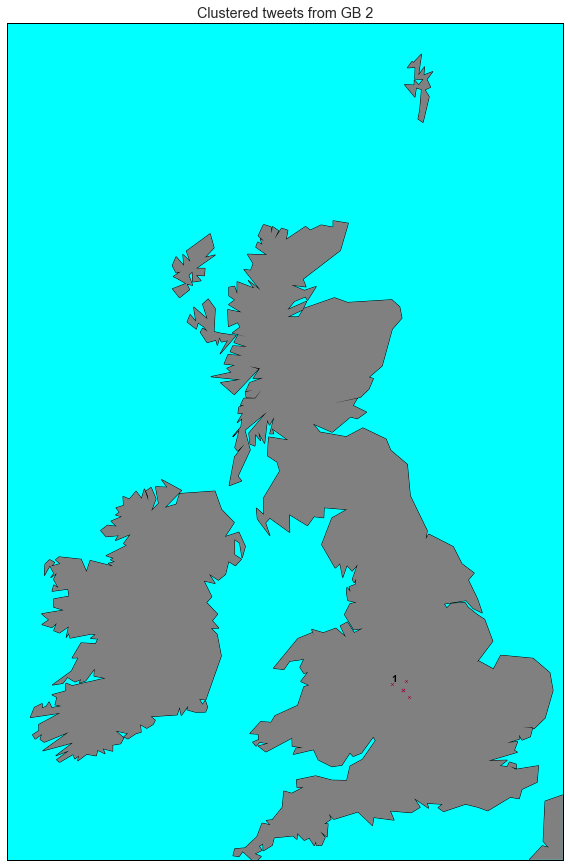

Making the Map took: 2.419656991958618
Method 2 took: 38.94415998458862
start calculating
1. Cluster, with 21 tweets, 20 distinct users.
This cluster is From: 01.07.2016 To: 01.07.2016
 
(51.503697830476192, -0.13152179571428568)
Location:  City of Westminster,  London,  Greater London,  England
Most similar words:
['kingdom', 'united…', 'kindom', 'united', 'paddington…', 'brockely', 'kingdom/', '#farewell', 'southampton', '59.0']
 
The most freq. words are: 
[   ('london', 22),
    ('united', 21),
    ('kingdom', 21),
    ('#london', 6),
    ('feet', 1),
    ('stripes', 1),
    ('backseat', 1),
    ('ready', 1),
    ('#costa', 1),
    ('#über', 1)]
 
[   'Ready, Set, GO! @ London, United Kingdom https://t.co/t5qnhF9MSD',
    '#Housefull3 @ London, United Kingdom https://t.co/KiAGbSdf1m',
    '@singhaccount EAT clean @ London, United Kingdom https://t.co/x7km6V92GE',
    'B U F F A L O//B O Y S @wonderlandmag @ London, United Kingdom '
    'https://t.co/vtcQMPlf9b',
    '#GreyTownHall 

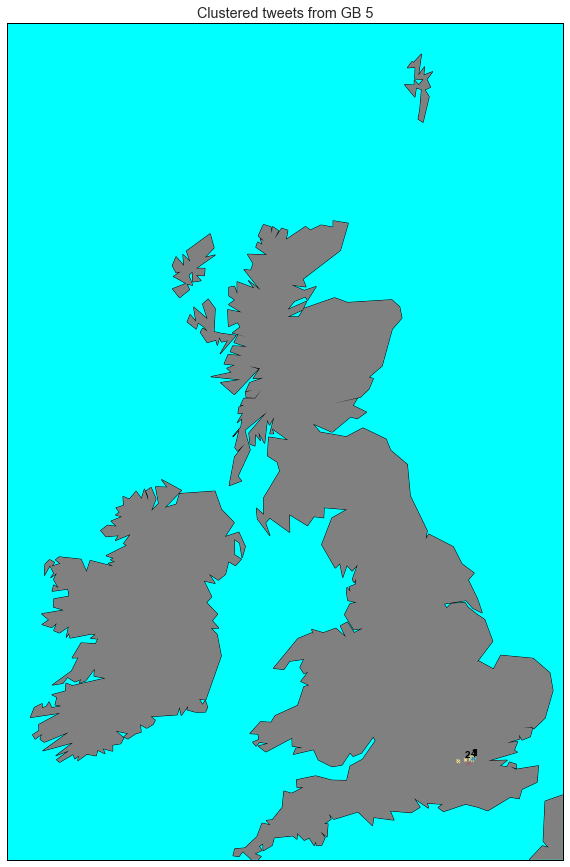

Making the Map took: 42.34959888458252
Method 2 took: 0.12010812759399414
start calculating
There were 41 out of 46 Tweets that were clustered as noise
This is 89.1304347826%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6795361042022705
Method 2 took: 0.27283406257629395
start calculating
There were 5 out of 81 Tweets that were clustered as noise
This is 6.17283950617%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.7916009426116943
Method 2 took: 1.31427001953125
start calculating
There were 132 out of 172 Tweets that were clustered as noise
This is 76.7441860465%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 1.8384900093078613
Method 2 took: 0.06946897506713867
start calculating
There were 32 out of 37 Tweets that were clustered as noise
This is 86.4864864865%.
Attempted to make map but there were not enough Tweets 

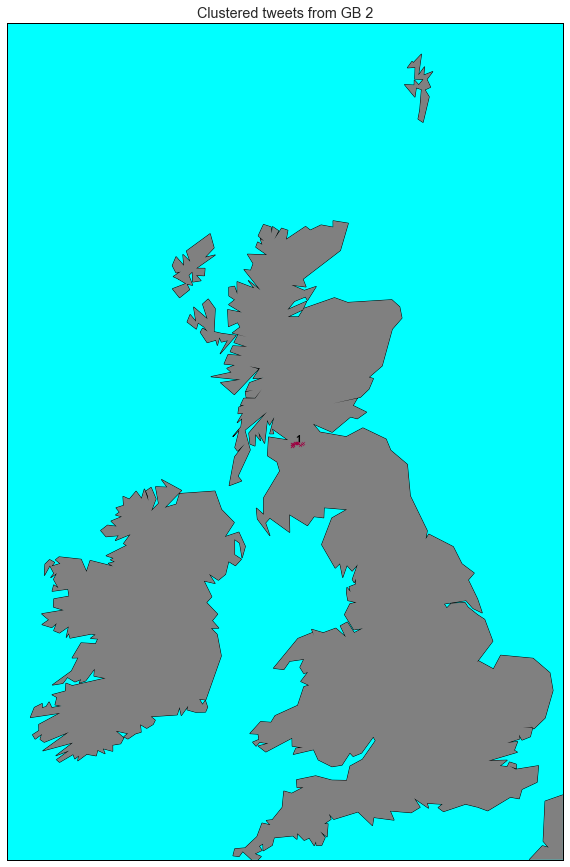

Making the Map took: 1.7007739543914795
Method 2 took: 0.04120993614196777
start calculating
There were 18 out of 25 Tweets that were clustered as noise
This is 72.0%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5976059436798096
Method 2 took: 0.42334699630737305
start calculating
There were 83 out of 88 Tweets that were clustered as noise
This is 94.3181818182%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.9967629909515381
Method 2 took: 0.3993980884552002
start calculating
1. Cluster, with 7 tweets, 3 distinct users.
This cluster is From: 01.07.2016 To: 01.07.2016
 
(51.547745711428568, -3.1294828428571426)
Location:  Rudry,  Draethen,  Caerphilly,  Wales
Most similar words:
['wembley', 'stadium', 'millennium', 'principality', 'beyonce', 'beyoncé', '#formationworldtour', 'cardiff', '#beyonce', 'etihad']
 
The most freq. words are: 
[   ('stadium', 7),
    ('cardiff', 7

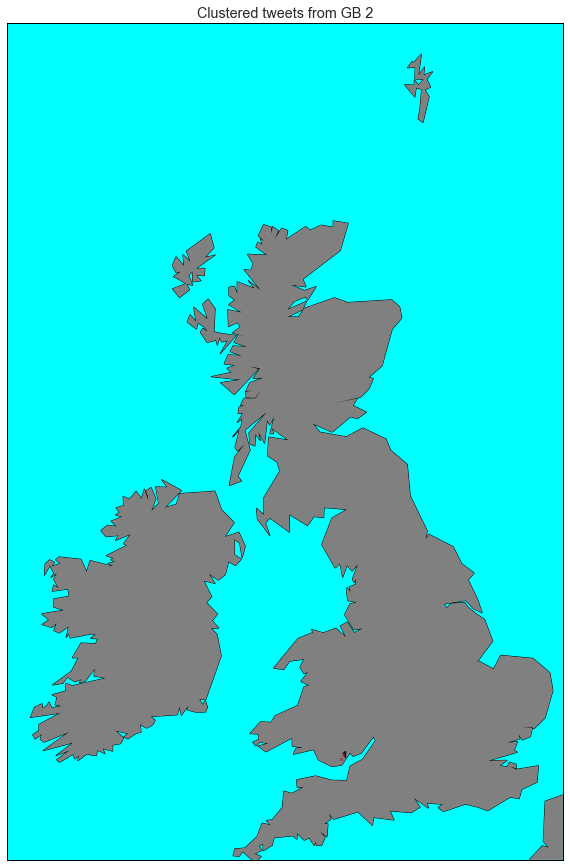

Making the Map took: 1.8019359111785889
Method 2 took: 0.015761137008666992
start calculating
There were 2 out of 14 Tweets that were clustered as noise
This is 14.2857142857%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6106071472167969
Method 2 took: 0.007411003112792969
start calculating
There were 3 out of 10 Tweets that were clustered as noise
This is 30.0%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6226880550384521
Method 2 took: 0.12428402900695801
start calculating
1. Cluster, with 10 tweets, 7 distinct users.
This cluster is From: 01.07.2016 To: 01.07.2016
 
(51.537521399999989, -0.89976999999999996)
Location:  Remenham CP,  Wokingham,  South East,  England
Most similar words:
['henley', 'regatta', 'royal', 'botanic…', '#henleyregatta', '#henley2016', 'of…', 'welsh…', '#notobrexit', '#regatta']
 
The most freq. words are: 
[   ('henley', 10),
    ('royal', 10

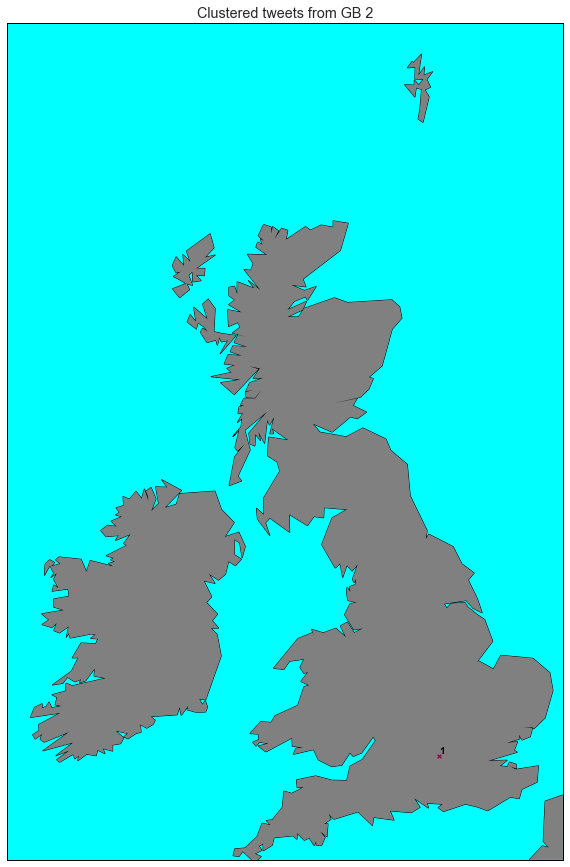

Making the Map took: 1.4439828395843506
Method 2 took: 0.004882097244262695
start calculating
There were 3 out of 8 Tweets that were clustered as noise
This is 37.5%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5460810661315918
Method 2 took: 0.011485099792480469
start calculating
1. Cluster, with 9 tweets, 4 distinct users.
This cluster is From: 01.07.2016 To: 01.07.2016
 
(53.234899999999996, -1.7051400000000001)
Location:  Ashford in the Water CP,  Derbyshire Dales,  Derbyshire,  East Midlands
Most similar words:
['thornbridge', 'drinking', 'ale', 'woza', '/pint', 'stout', 'ipa', '#photo', 'cider', 'pilsner']
 
The most freq. words are: 
[   ('hall', 9),
    ('drinking', 9),
    ('thornbridge', 9),
    ('#photo', 5),
    ('american', 2),
    ('wheat', 2),
    ('crakendale', 2),
    ('lovely', 2),
    ('beer', 2),
    ('taste', 1)]
 
[   'Drinking a Fika by @thornbridge @ Thornbridge Hall — '
    'https://t.co/o74FxvhWbS #pho

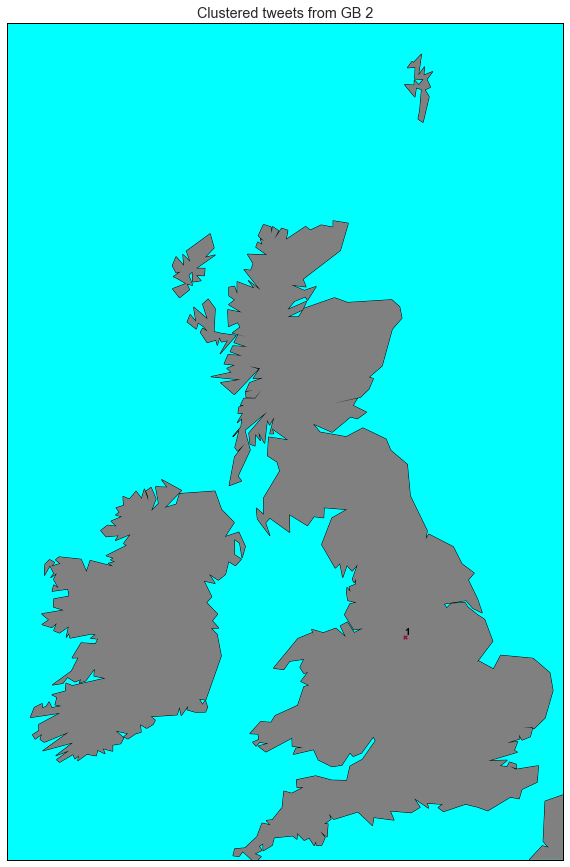

Making the Map took: 1.2642879486083984
Method 2 took: 0.004868984222412109
start calculating
There were 2 out of 7 Tweets that were clustered as noise
This is 28.5714285714%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5244221687316895
There were 545 Tweets that were clustered as noise
Begin Analysis for next day
2 day Clustered. The passed time is: 0.05725407600402832
labelsMethod2_loc: 5000
start calculating
Method 2 took: 39.4877290725708
start calculating
1. Cluster, with 16 tweets, 15 distinct users.
This cluster is From: 02.07.2016 To: 02.07.2016
 
(51.507114860000001, -0.12731804999999999)
Location:  City of Westminster,  London,  Greater London,  England
Most similar words:
['kingdom', 'united…', 'kindom', 'united', 'kingdom/', 'paddington…', 'brockely', '#farewell', '59.0', 'karpet']
 
The most freq. words are: 
[   ('london', 17),
    ('kingdom', 16),
    ('united', 16),
    ('#london', 1),
    ('#iamknighthood', 1),

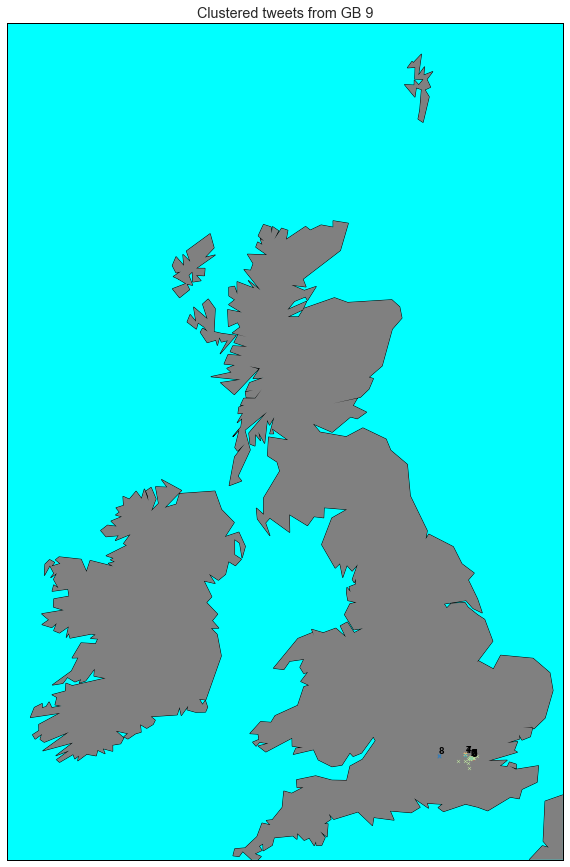

Making the Map took: 42.47658896446228
Method 2 took: 1.3530471324920654
start calculating
1. Cluster, with 5 tweets, 3 distinct users.
This cluster is From: 02.07.2016 To: 02.07.2016
 
(53.234874424000012, -1.7050723179999998)
Location:  Ashford in the Water CP,  Derbyshire Dales,  Derbyshire,  East Midlands
Most similar words:
['thornbridge', 'drinking', 'cider', 'woza', '/pint', '#peakender', 'ale', 'stout', 'ipa', 'supping']
 
The most freq. words are: 
[   ('hall', 5),
    ('thornbridge', 5),
    ('drinking', 4),
    ('#peakender', 2),
    ('peverel', 1),
    ('refreshing', 1),
    ('#thornbridgebrewery', 1),
    ('decent', 1),
    ('valravn', 1),
    ('pretty', 1)]
 
[   'Very refreshing - Drinking a Peverel by @thornbridge @ Thornbridge Hall  '
    '— https://t.co/C7w5sA8xhf',
    'Jaipur Beer Bus #peakender #thornbridgebrewery @ Thornbridge Hall '
    'https://t.co/NhpV9OOSxj',
    'Pretty immense - Drinking a Tonka by @hawksheadbrewer @ Thornbridge Hall  '
    '— https://t.co/

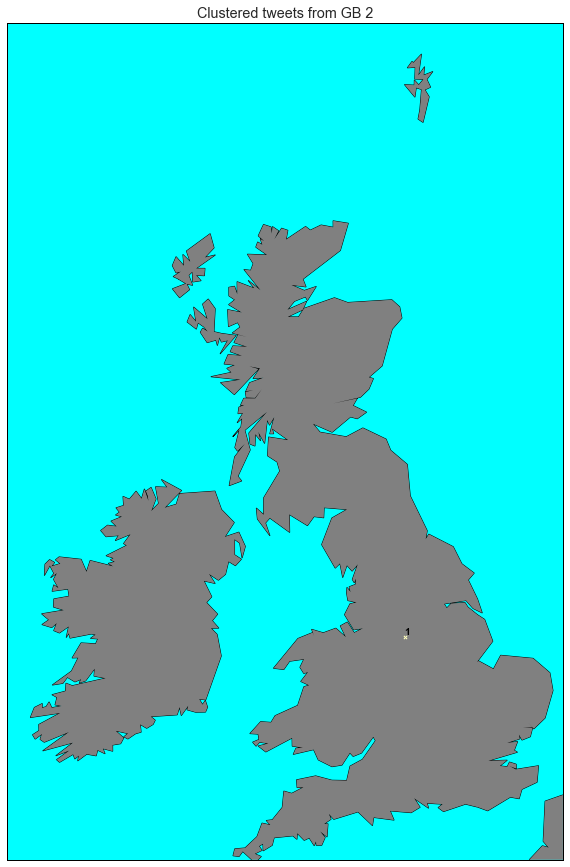

Making the Map took: 2.7780890464782715
Method 2 took: 6.300274848937988
start calculating
1. Cluster, with 7 tweets, 7 distinct users.
This cluster is From: 02.07.2016 To: 02.07.2016
 
(53.478600000000007, -2.2166385714285712)
Location:  Manchester,  Greater Manchester,  North West England,  England
Most similar words:
['kingdom', 'kindom', 'united', 'united…', 'kingdom/', '59.0', 'combines', 'paddington…', 'brockely', 'atlantica']
 
The most freq. words are: 
[   ('kingdom', 7),
    ('united', 7),
    ('manchester', 7),
    ('#colourmehappy', 2),
    ('oldham', 1),
    ('manchestaaaa', 1),
    ('💙💚💛❤💜', 1),
    ('#colorrun', 1),
    ('#fac51', 1),
    ('#manchestercolourrun', 1)]
 
[   'Yours sincerely, Manchester x @ Manchester, United Kingdom '
    'https://t.co/F4x9I4Refx',
    '💙💚💛❤💜 #manchestercolourrun #colourmehappy @ Manchester, United Kingdom '
    'https://t.co/O8QHHpU35x',
    '#colourmehappy #us #colorrun @ Manchester, United Kingdom '
    'https://t.co/YDB1xrraNJ',
    '

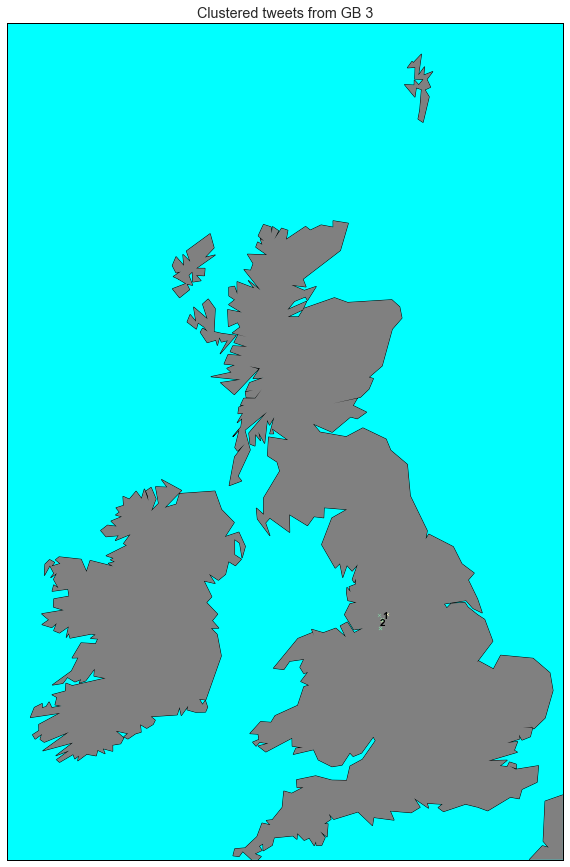

Making the Map took: 8.276283025741577
Method 2 took: 0.010565996170043945
start calculating
There were 7 out of 13 Tweets that were clustered as noise
This is 53.8461538462%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5581619739532471
Method 2 took: 0.1621570587158203
start calculating
There were 2 out of 61 Tweets that were clustered as noise
This is 3.27868852459%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 4.848973989486694
Method 2 took: 0.08404994010925293
start calculating
There were 32 out of 38 Tweets that were clustered as noise
This is 84.2105263158%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6555280685424805
There were 575 Tweets that were clustered as noise
Begin Analysis for next day
3 day Clustered. The passed time is: 0.061849117279052734
labelsMethod2_loc: 5000
start calculating
Method 2 took:

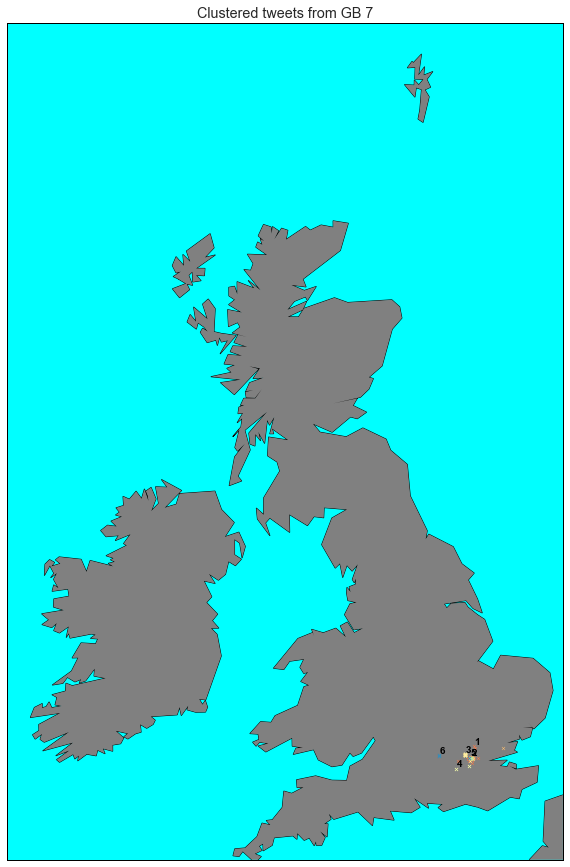

Making the Map took: 40.97271990776062
Method 2 took: 2.465770959854126
start calculating
1. Cluster, with 5 tweets, 5 distinct users.
This cluster is From: 03.07.2016 To: 03.07.2016
 
(53.456467603999997, -2.2634051660000001)
Location:  Trafford,  Greater Manchester,  North West England,  England
Most similar words:
['greater', 'manchester', 'funscape', '9¾', 'harringay', 'sheffield', 'central', 'hammersmith', 'broadway', 'picturehouse']
 
The most freq. words are: 
[   ('manchester', 9),
    ('greater', 5),
    ('timperley', 2),
    ('shudehill', 1),
    ('chorlton', 1),
    ('railway', 1),
    ('interchange', 1),
    ('station', 1),
    ('central', 1),
    ('intelligence', 1)]
 
[   "I'm at @ODEONCinemas for Central Intelligence in Manchester, Greater "
    'Manchester https://t.co/F0n6Swvvwb',
    "I'm at @CromaPizza in Chorlton, Greater Manchester "
    'https://t.co/Z959NBoIKG',
    "I'm at Timperley in Timperley, Greater Manchester https://t.co/uJo6hpt2Bm",
    "I'm at Mancheste

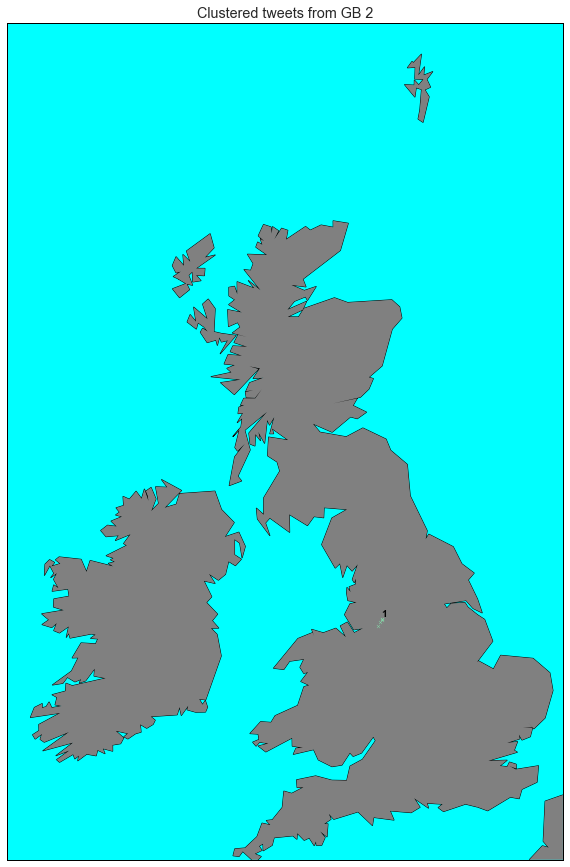

Making the Map took: 3.6711220741271973
Method 2 took: 0.47399091720581055
start calculating
There were 84 out of 91 Tweets that were clustered as noise
This is 92.3076923077%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 1.0401198863983154
Method 2 took: 0.1726529598236084
start calculating
There were 5 out of 53 Tweets that were clustered as noise
This is 9.43396226415%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.8007209300994873
Method 2 took: 1.6505110263824463
start calculating
1. Cluster, with 5 tweets, 3 distinct users.
This cluster is From: 03.07.2016 To: 03.07.2016
 
(53.568759999999997, -1.4896919999999998)
Location:  Athersley,  Barnsley,  Yorkshire and the Humber,  England
Most similar words:
['#photo', 'stout', 'drinking', 'tripel', 'ipa', 'ale', '#camrgb', 'modelo', 'lager', 'simcoe']
 
The most freq. words are: 
[   ('#photo', 5),
    ('drinking', 5),
    (

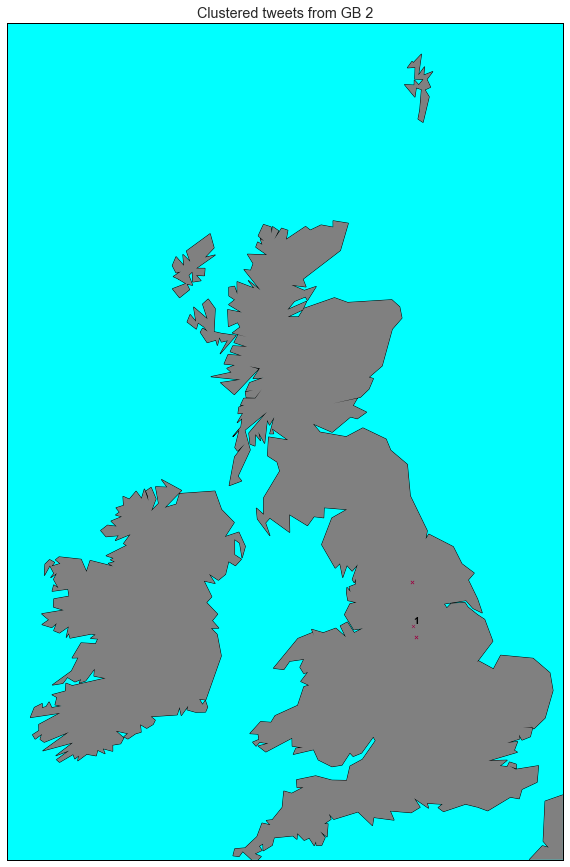

The number of clusters that were ignored because of quality issues is: 1
Making the Map took: 2.8994081020355225
Method 2 took: 0.04634284973144531
start calculating
There were 17 out of 28 Tweets that were clustered as noise
This is 60.7142857143%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6188490390777588
Method 2 took: 0.1167759895324707
start calculating
1. Cluster, with 6 tweets, 6 distinct users.
This cluster is From: 03.07.2016 To: 03.07.2016
 
(52.389822649999992, -1.52629474)
Location:  Green Lane,  Coventry,  West Midlands,  England
Most similar words:
['festival', 'fest', 'godiva', 'festival…', 'carnival', 'hall', 'hall…', 'park', 'cornbury', 'regatta']
 
The most freq. words are: 
[   ('godiva', 8),
    ('festival', 7),
    ('park', 6),
    ('memorial', 6),
    ('#godivafestival', 4),
    ('trip', 1),
    ('last', 1),
    ('time', 1),
    ('weather', 1),
    ('fest', 1)]
 
[   'Last minute trip to Godiva festival 

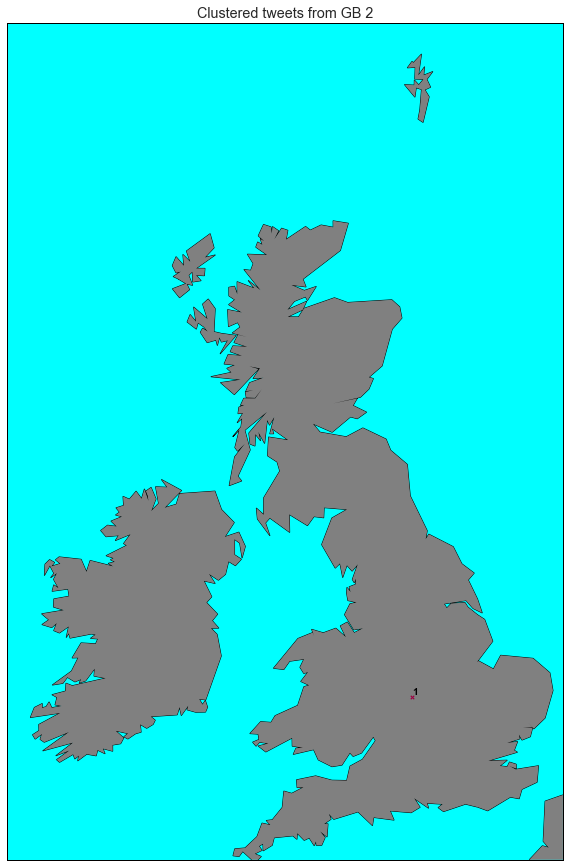

Making the Map took: 1.4027221202850342
Method 2 took: 0.15413713455200195
start calculating
There were 47 out of 52 Tweets that were clustered as noise
This is 90.3846153846%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.7397201061248779
Method 2 took: 0.5112950801849365
start calculating
There were 90 out of 95 Tweets that were clustered as noise
This is 94.7368421053%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 1.087033987045288
Method 2 took: 0.7676601409912109
start calculating
1. Cluster, with 5 tweets, 5 distinct users.
This cluster is From: 03.07.2016 To: 03.07.2016
 
(52.53209348, -1.8567291799999999)
Location:  Short Heath,  Birmingham,  West Midlands,  England
Most similar words:
['giroud', 'mins', '#fra', 'goal', '4-0', 'minutes', '#por', '2-0', 'payet', 'bastian']
 
The most freq. words are: 
[('gone', 5), ('mins', 5), ('!!!!', 5), ('#fra', 5), ('giroud', 5)]

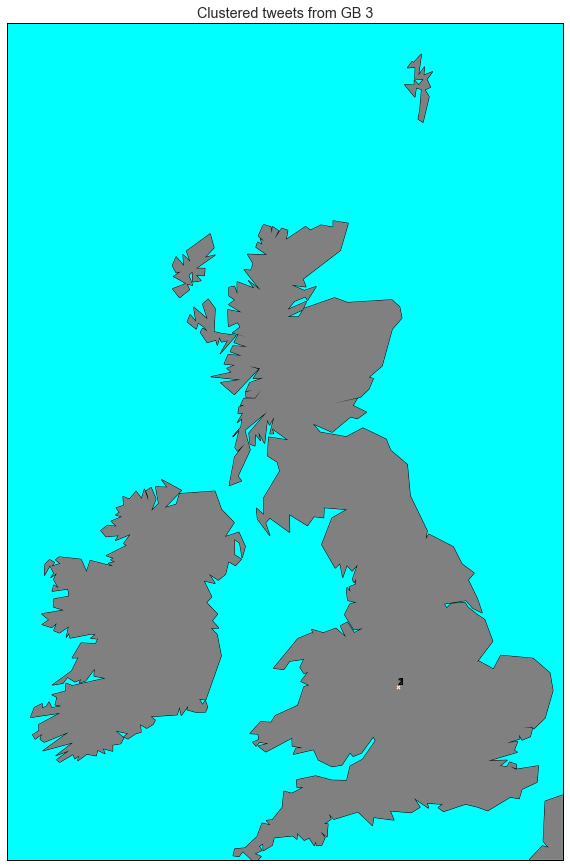

Making the Map took: 2.216012954711914
Method 2 took: 0.008025884628295898
start calculating
There were 5 out of 10 Tweets that were clustered as noise
This is 50.0%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5847759246826172
Method 2 took: 0.11139988899230957
start calculating
There were 39 out of 44 Tweets that were clustered as noise
This is 88.6363636364%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6750929355621338
Method 2 took: 0.021671056747436523
start calculating
There were 12 out of 17 Tweets that were clustered as noise
This is 70.5882352941%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5844171047210693
Method 2 took: 0.04274797439575195
start calculating
There were 9 out of 27 Tweets that were clustered as noise
This is 33.3333333333%.
Attempted to make map but there were not enough Tweets produce

KeyboardInterrupt: 

In [184]:
import random
import time

#Method2

groupedByDay = [group[1] for group in df2.groupby([df2.index.year,df2.index.month,df2.index.day])]

#print(groupedByDay)

#set seed for sample
seed = 4715
random.seed(seed)

#Sample size
list_of_sizes = [1000, 2000, 5000]

time_weight = "N/A"
loc_weight = 1
text_weight = 6

for numOfTweets in list_of_sizes:
    for dailyTweets in groupedByDay:
        print("Begin Analysis for next day")

        #get region clusters

        if len(dailyTweets) > numOfTweets:
            rindex =  np.array(random.sample(range(len(dailyTweets)), numOfTweets))
        else:
            rindex = range(len(dailyTweets))
        sampleForMethod2 = dailyTweets.ix[rindex]

        #print(dailyTweets.AvgWordEmbeddings)
        #wordembeddings have to be separately picked


        labelsMethod2_loc = method2_location(sampleForMethod2, minpts=5, eps=0.1)
        print("labelsMethod2_loc: " + str(len(labelsMethod2_loc)))
        uniquelabels2 = set(labelsMethod2_loc)

        print("start calculating")
        #plot each cluster individually
        for region in uniquelabels2:

            #currentClusterDF = subset dataframe by current k by index given in label variable
            class_member_mask = (labelsMethod2_loc == region)

            if region == -1:
                # don't print noise, but count number of noise tweets
                print("There were " + str(sum((class_member_mask))) + " Tweets that were clustered as noise")
                # m.scatter(x1, y1, s=4, marker="o", c=col, alpha=0.5, zorder=10)            
            else:
                #BUG IS HERE
                regiondf = sampleForMethod2[class_member_mask]

                if len(regiondf) > numOfTweets:
                    print("length of regiondf: " + str(len(regiondf)))
                    rindex2 =  np.array(random.sample(range(len(regiondf)), 20000))
                else:
                    rindex2 = range(len(regiondf))
                sampleForMethod22 = regiondf.ix[rindex2]            

                we = sampleForMethod22.AvgWordEmbeddings.ix[rindex2]
                #sampleForMethod1 = df2.sample(n=set_size, random_state=seed)
                #print(we.values)



                start = time.time()

                B = np.zeros((len(we),dimensions),float)
                B[:,0:]=np.vstack(we.as_matrix())

                B = B[~np.isnan(B).any(axis=1)]

                minpts = 5
                eps= 0.1

                #break
                if len(B) > 1000:
                    B = B[:1000] 
                db2 = DBSCAN(eps=eps, min_samples=minpts, metric=d2, algorithm='ball_tree').fit(B)

                if len(np.unique(db2.labels_)) > 1:
                    print("Method 2 took: " + str(time.time() - start))
                    end = time.time() - start

                    #labels, dataframe, meth, sample_size, seed_no, timePassed=0
                    make_the_Cluster_Eval(db2.labels_, regiondf, 2, numOfTweets, seed, end)
                    print("Making the Map took: " + str(time.time() - start))


In [45]:
sampleForMethod22.head()

timestamp_ms
2016-07-01 17:58:24    [-0.739828970283, 0.27851848801, -0.426860143741, -0.294622230654, -0.170944824815, 0.1227019124...
2016-07-01 16:02:46    [-1.19786860049, 0.257474703093, 0.402487983306, 0.831723567254, -2.7567309107, 0.191709041595, ...
2016-07-01 14:49:16    [1.5809151956, 1.46616791402, 0.26807294786, -1.31421674256, -1.36984936893, 0.492094624655, -0....
2016-07-01 13:42:40    [0.268972123042, 1.92903293452, -1.5152807037, -1.82200564692, -0.470762789249, -0.904212129613,...
2016-07-01 17:55:18    [-0.710906187693, 0.309089104335, 0.683294852575, 0.443452974161, -1.04036124547, 0.860136936108...
Name: AvgWordEmbeddings, dtype: object

In [565]:
from datetime import datetime, date

# (now.astype('uint64') / 1e6).astype('uint32')
a = (df2.index.values.astype('uint64') / 1e9).astype('uint32').reshape(-1,1)

print(df2.index.values[0])
for i in range(1,10):
    b = abs((datetime.fromtimestamp(a[0]) - datetime.fromtimestamp(a[i])).days + 1)
    print(print(df2.index.values[i]))
    print(str(i) + " versuche " + str(b))

#print(b / np.timedelta64(1, 'D'))

2016-07-01T13:35:29.000000000
2016-07-01T13:35:29.000000000
None
1 versuche 1
2016-07-01T13:35:31.000000000
None
2 versuche 0
2016-07-01T13:35:31.000000000
None
3 versuche 0
2016-07-01T13:35:33.000000000
None
4 versuche 0
2016-07-01T13:35:33.000000000
None
5 versuche 0
2016-07-01T13:35:35.000000000
None
6 versuche 0
2016-07-01T13:35:42.000000000
None
7 versuche 0
2016-07-01T13:35:46.000000000
None
8 versuche 0
2016-07-01T13:35:54.000000000
None
9 versuche 0


In [474]:
print(df2.index.values[0])
print(df2.index.values[10000])

2016-07-01T13:35:29.000000000
2016-07-02T20:32:50.000000000


In [134]:
#sampleForMethod1.latitude.values.reshape(-1, 1).shape
#print(we.values)



B = np.zeros((len(sampleForMethod1),52+4),float)
B[:,0]= sampleForMethod1.latitude.values
B[:,1]= sampleForMethod1.longitude.values
B[:,2]= sampleForMethod1.User.values
B[:,3]= (sampleForMethod1.index.values.astype('uint64') / 1e9).astype('uint32')
B[:,4:]=np.vstack(we.values)
#B[:,4:]=np.vstack(A[:,-1])

#toge = np.hstack((sampleForMethod1.latitude.values.reshape(-1, 1), we.values.reshape(-1,1)))


In [38]:
regiondf

In [186]:
#test
#print(B[14,2])
tw = 42
print(sampleForMethod1.tweet.ix[tw])
print(" ")

for i in range(0,10):
    res = False
    res = d(B[tw,:], B[i,:], p="do")
    if res:
        print(str(i) + " " + str(sampleForMethod1.tweetList.ix[i]))
        print(" ")
    

For great broadband deals in E10 5PE, visit https://t.co/2oIfjykvbz #broadbandcompareuk #broadbanddeals #bestbroadband
 


In [20]:
df2.head(100).describe(include = 'all')

NameError: name 'df2' is not defined

In [655]:
B[1,4] = 0.5

In [203]:
model.most_similar(["car"])

[('cars', 0.7687591910362244),
 ('motorbike', 0.7680193185806274),
 ('bike', 0.7658466100692749),
 ('truck', 0.7460272908210754),
 ('bus', 0.7108991146087646),
 ('taxi', 0.7093056440353394),
 ('lorry', 0.7092232704162598),
 ('tractor', 0.6920130252838135),
 ('tyre', 0.6682292222976685),
 ('litter', 0.6643306016921997)]

In [8]:
model["car"]

array([ 0.1995443 ,  0.37508586, -0.39470574, -4.02288914, -3.62302804,
       -3.40626574,  0.38030875,  4.26643181, -3.46284366, -2.4472425 ,
       -2.25115204,  3.7440114 ,  0.56132579, -3.6777637 , -0.77236313,
        0.92840308,  1.50409091,  3.0234282 ,  0.15087278, -2.19256592,
        1.83837807,  2.26347899, -4.11551094,  1.06873369,  2.42899966,
        0.27069977,  0.98271459,  1.35362601, -0.72429442,  2.37757063,
       -0.91550231, -0.63467616,  0.6199826 ,  1.29435802,  1.02636409,
        1.50223911,  0.82686687,  0.53867197,  2.08513141,  1.96421909,
       -1.12677741,  2.10488415, -1.6984756 , -0.45382696,  2.20160651,
        1.41494298, -0.60141623,  3.02182579,  0.46232915,  0.88800985,
       -0.87137526, -0.18688737], dtype=float32)

[('crossing', 0.5743743777275085),
 ('serviced', 0.5701886415481567),
 ('boat', 0.5625020265579224),
 ('airfield', 0.5392100214958191),
 ('barrier', 0.5373731851577759),
 ('footpath', 0.5346327424049377),
 ('halfords', 0.5251151323318481),
 ('paving', 0.5199755430221558),
 ('bike', 0.5136929154396057),
 ('cla', 0.5129467844963074)]